In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
from collections import defaultdict

In [2]:
import matplotlib as mpl
# matplotlib.rcParams['font.sans-serif'] = ['SimHei']  # 用黑体显示中文
# matplotlib.rcParams['axes.unicode_minus'] = False  # 正常显示负号

# 绘图设置
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif'] = ['Times New Roman']

In [14]:
mpl.use('WebAgg')

In [3]:
os.chdir(r"G:\2023-纵向\停车分配\save_data_1121")
os.getcwd()

'G:\\2023-纵向\\停车分配\\save_data_1121'

# basic analysis

In [4]:
def load_result_data(base_dir, skip_folders=None):
    if skip_folders is None:
        skip_folders = []

    methods = ['fbfs','dp','rdp','so','unp-rdp']
    merged_data = {method: defaultdict(lambda: defaultdict(list)) for method in methods}

    # 遍历所有的子文件夹
    for root, dirs, files in os.walk(base_dir):
        # 跳过指定的文件夹
        dirs[:] = [d for d in dirs if d not in skip_folders]

        # 检查是否在 result_info 目录下
        if 'result_info' in root:
            folder_name = os.path.basename(os.path.dirname(root))  # 例如 '50-1', '75-1'

            for file in files:
                if file.endswith('.npy'):
                    method = file.split('_')[0]  # 例如 'fbfs', 'dp', 'rdp'
                    method_version = file.split('.')[0]  # 例如 'fbfs_1', 'dp_2'

                    if method in merged_data:
                        file_path = os.path.join(root, file)

                        try:
                            # 加载 .npy 文件内容（是一个字典）
                            npy_data = np.load(file_path, allow_pickle=True).item()
                        except Exception as e:
                            print(f"Error loading {file_path}: {e}")
                            continue  # 跳过出错的文件

                        # 将数据合并到相应的字典中
                        for key, value in npy_data.items():
                            merged_data[method][method_version][key].append((int(folder_name.split('-')[0]), value))

    return merged_data

# 设置要跳过的文件夹
# skip_folders = [str(i)+'-1'for i in range(525,1025,25)]
# skip_folders.extend(['25-1','test_fbfs'])

# 正确的 base_dir 路径设置
base_dir = r'G:\2023-纵向\停车分配\save_data_1121'
skip_folders = ['325-1','350-1']

result_info = load_result_data(base_dir, skip_folders)
# 输出记得sort()
for rule in result_info.keys():
    for version in result_info[rule].keys():
        for key in result_info[rule][version].keys():
            result_info[rule][version][key].sort()

In [14]:
def load_npy_data(base_dir, skip_folders=None):
    if skip_folders is None:
        skip_folders = []

    methods = ['fbfs', 'dp', 'rdp','so','unp-rdp']
    merged_data = {method: defaultdict(list) for method in methods}

    # 遍历所有的子文件夹
    for root, dirs, files in os.walk(base_dir):
        # 跳过指定的文件夹
        dirs[:] = [d for d in dirs if d not in skip_folders]

        # 检查是否在 result_info 目录下
        # if 'SNK_info' in root:
        if 'SNK_info' in root:
            folder_name = os.path.basename(os.path.dirname(root))  # 例如 '50-1', '75-1'

            for file in files:
                if file.endswith('.npy'):
                    method = file.split('_')[0]  # 例如 'fbfs', 'dp', 'rdp'
                    method_version = file.split('.')[0]  # 例如 'fbfs_1', 'dp_2'

                    if method in merged_data:
                        file_path = os.path.join(root, file)
                        npy_data = np.load(file_path, allow_pickle=True)
                        merged_data[method][method_version].append((int(folder_name.split('-')[0]), npy_data))

    return merged_data
# 正确的 base_dir 路径设置
base_dir = r'G:\2023-纵向\停车分配\save_data_1121'

In [15]:
snk_info = load_npy_data(base_dir, skip_folders)
# 输出记得sort()
for rule in snk_info.keys():
    for version in snk_info[rule].keys():
        snk_info[rule][version].sort()

In [108]:
snka_info = load_npy_data(base_dir, skip_folders)
for rule in snka_info.keys():
    for version in snka_info[rule].keys():
        snka_info[rule][version].sort()

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [18]:
cps = [20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 65, 66, 67, 68, 69, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]

ops = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 60, 61, 62, 63, 64, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84]

In [24]:
linestyle_tuple = [
     ('densely dotted',        (0, (1, 1))),
     ('long dash with offset', (5, (10, 3))),
     ('densely dashed',        (0, (5, 1))),
     ('densely dashdotted',    (0, (3, 1, 1, 1))),
     ('densely dashdotdotted', (0, (3, 1, 1, 1, 1, 1)))]

In [27]:
from matplotlib.ticker import ScalarFormatter

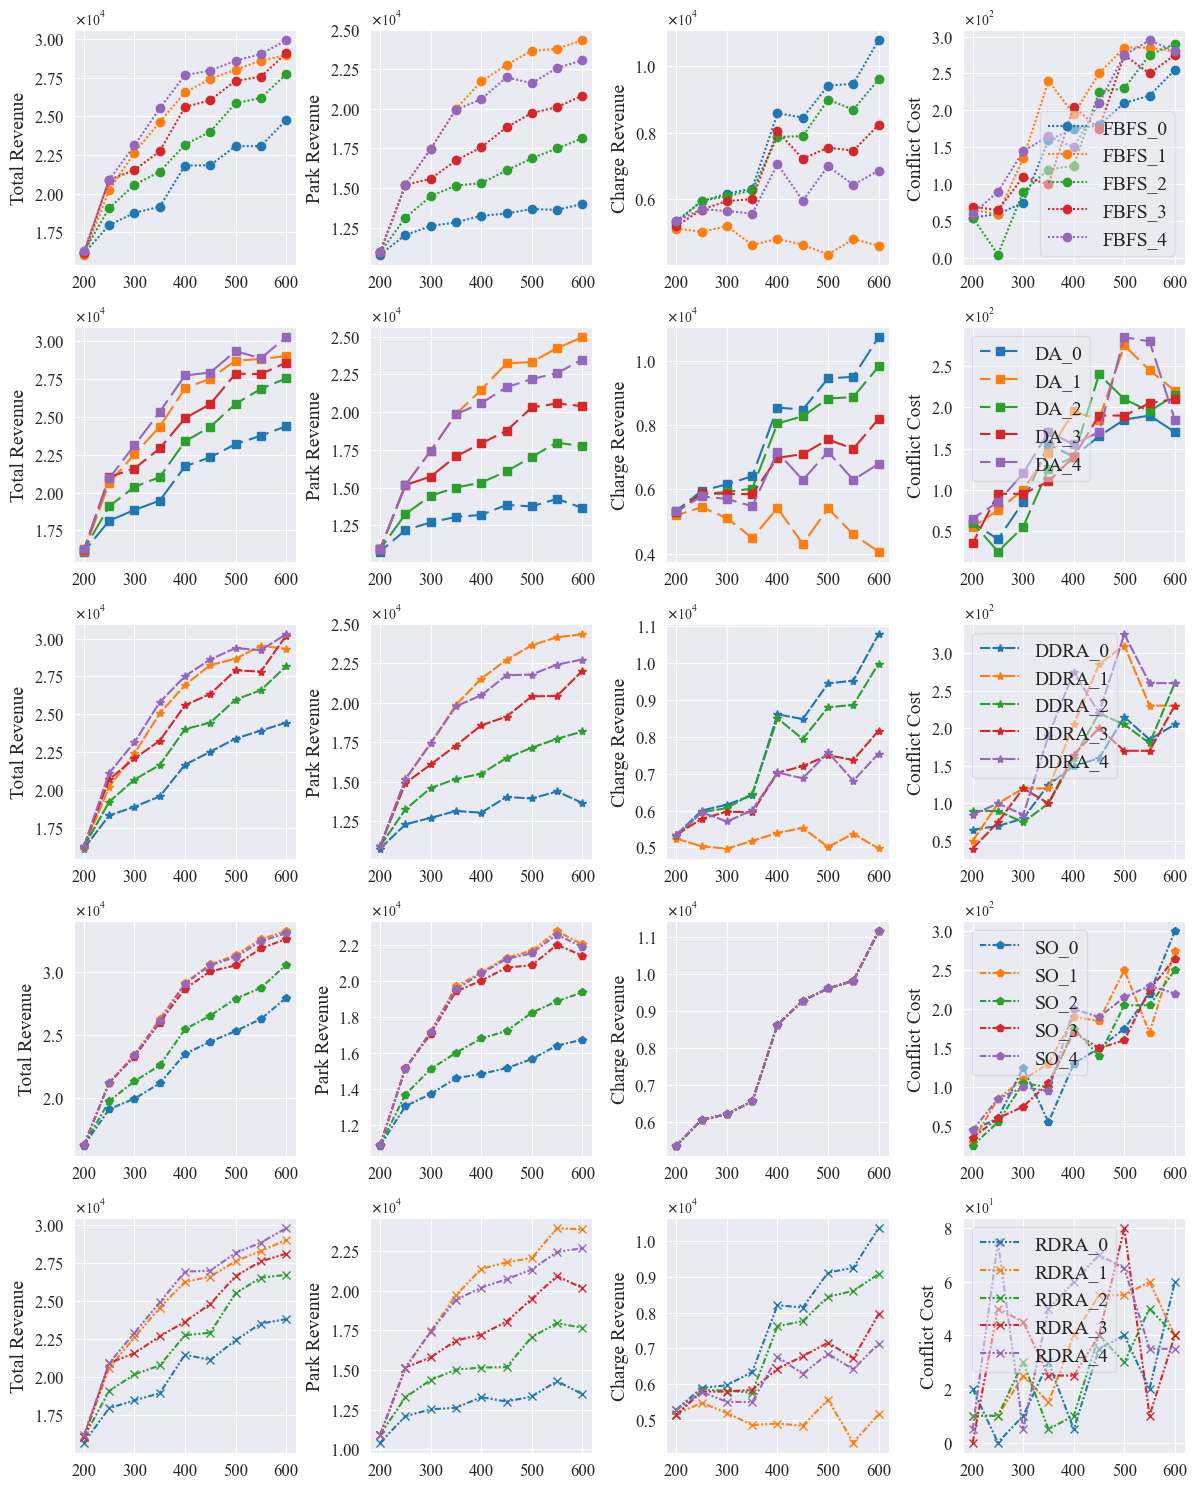

In [28]:
# total revenue
# bar和line的叠加
fig,axes = plt.subplots(5,4,figsize=(12,15))


x = [i*2 for i in range(100,325,25)]
mark_list = ['o','s','*','p','x']
label_list = ['Total Revenue','Park Revenue','Charge Revenue','Conflict Cost']
label_map = {'fbfs':'FBFS','dp':'DA','rdp':'DDRA','unp-rdp':'RDRA','so':'SO'}

for i,rule in enumerate(result_info.keys()):
    for j,key in enumerate(['total revenue','park revenue','char revenue','conflict cost']):
        for k,version in enumerate(result_info[rule].keys()):
            values = [value[1] for value in result_info[rule][version][key]]
            axes[i,j].plot(x,values,label=f'{label_map[rule]}_{k}',linestyle=linestyle_tuple[i][1],marker=mark_list[i])
        axes[i,j].set_ylabel(label_list[j],fontsize=14)
        axes[i,j].set_xticks([i for i in range(200,601,100)])
        axes[i,j].set_xticklabels([i for i in range(200,601,100)],fontsize=12)
        axes[i,j].yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
        axes[i,j].ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
        axes[i,j].tick_params(axis='y', labelsize=12)
        # axes[i,j].tick_params(axis='x', labelsize=12)
    axes[i,3].legend(fontsize=14,framealpha=0.5)
plt.tight_layout()
# plt.savefig(r"G:\纵向\小论文\共享停车和充电分配模型\analysis\model_case_revenue_new.png",dpi=300)
plt.show()

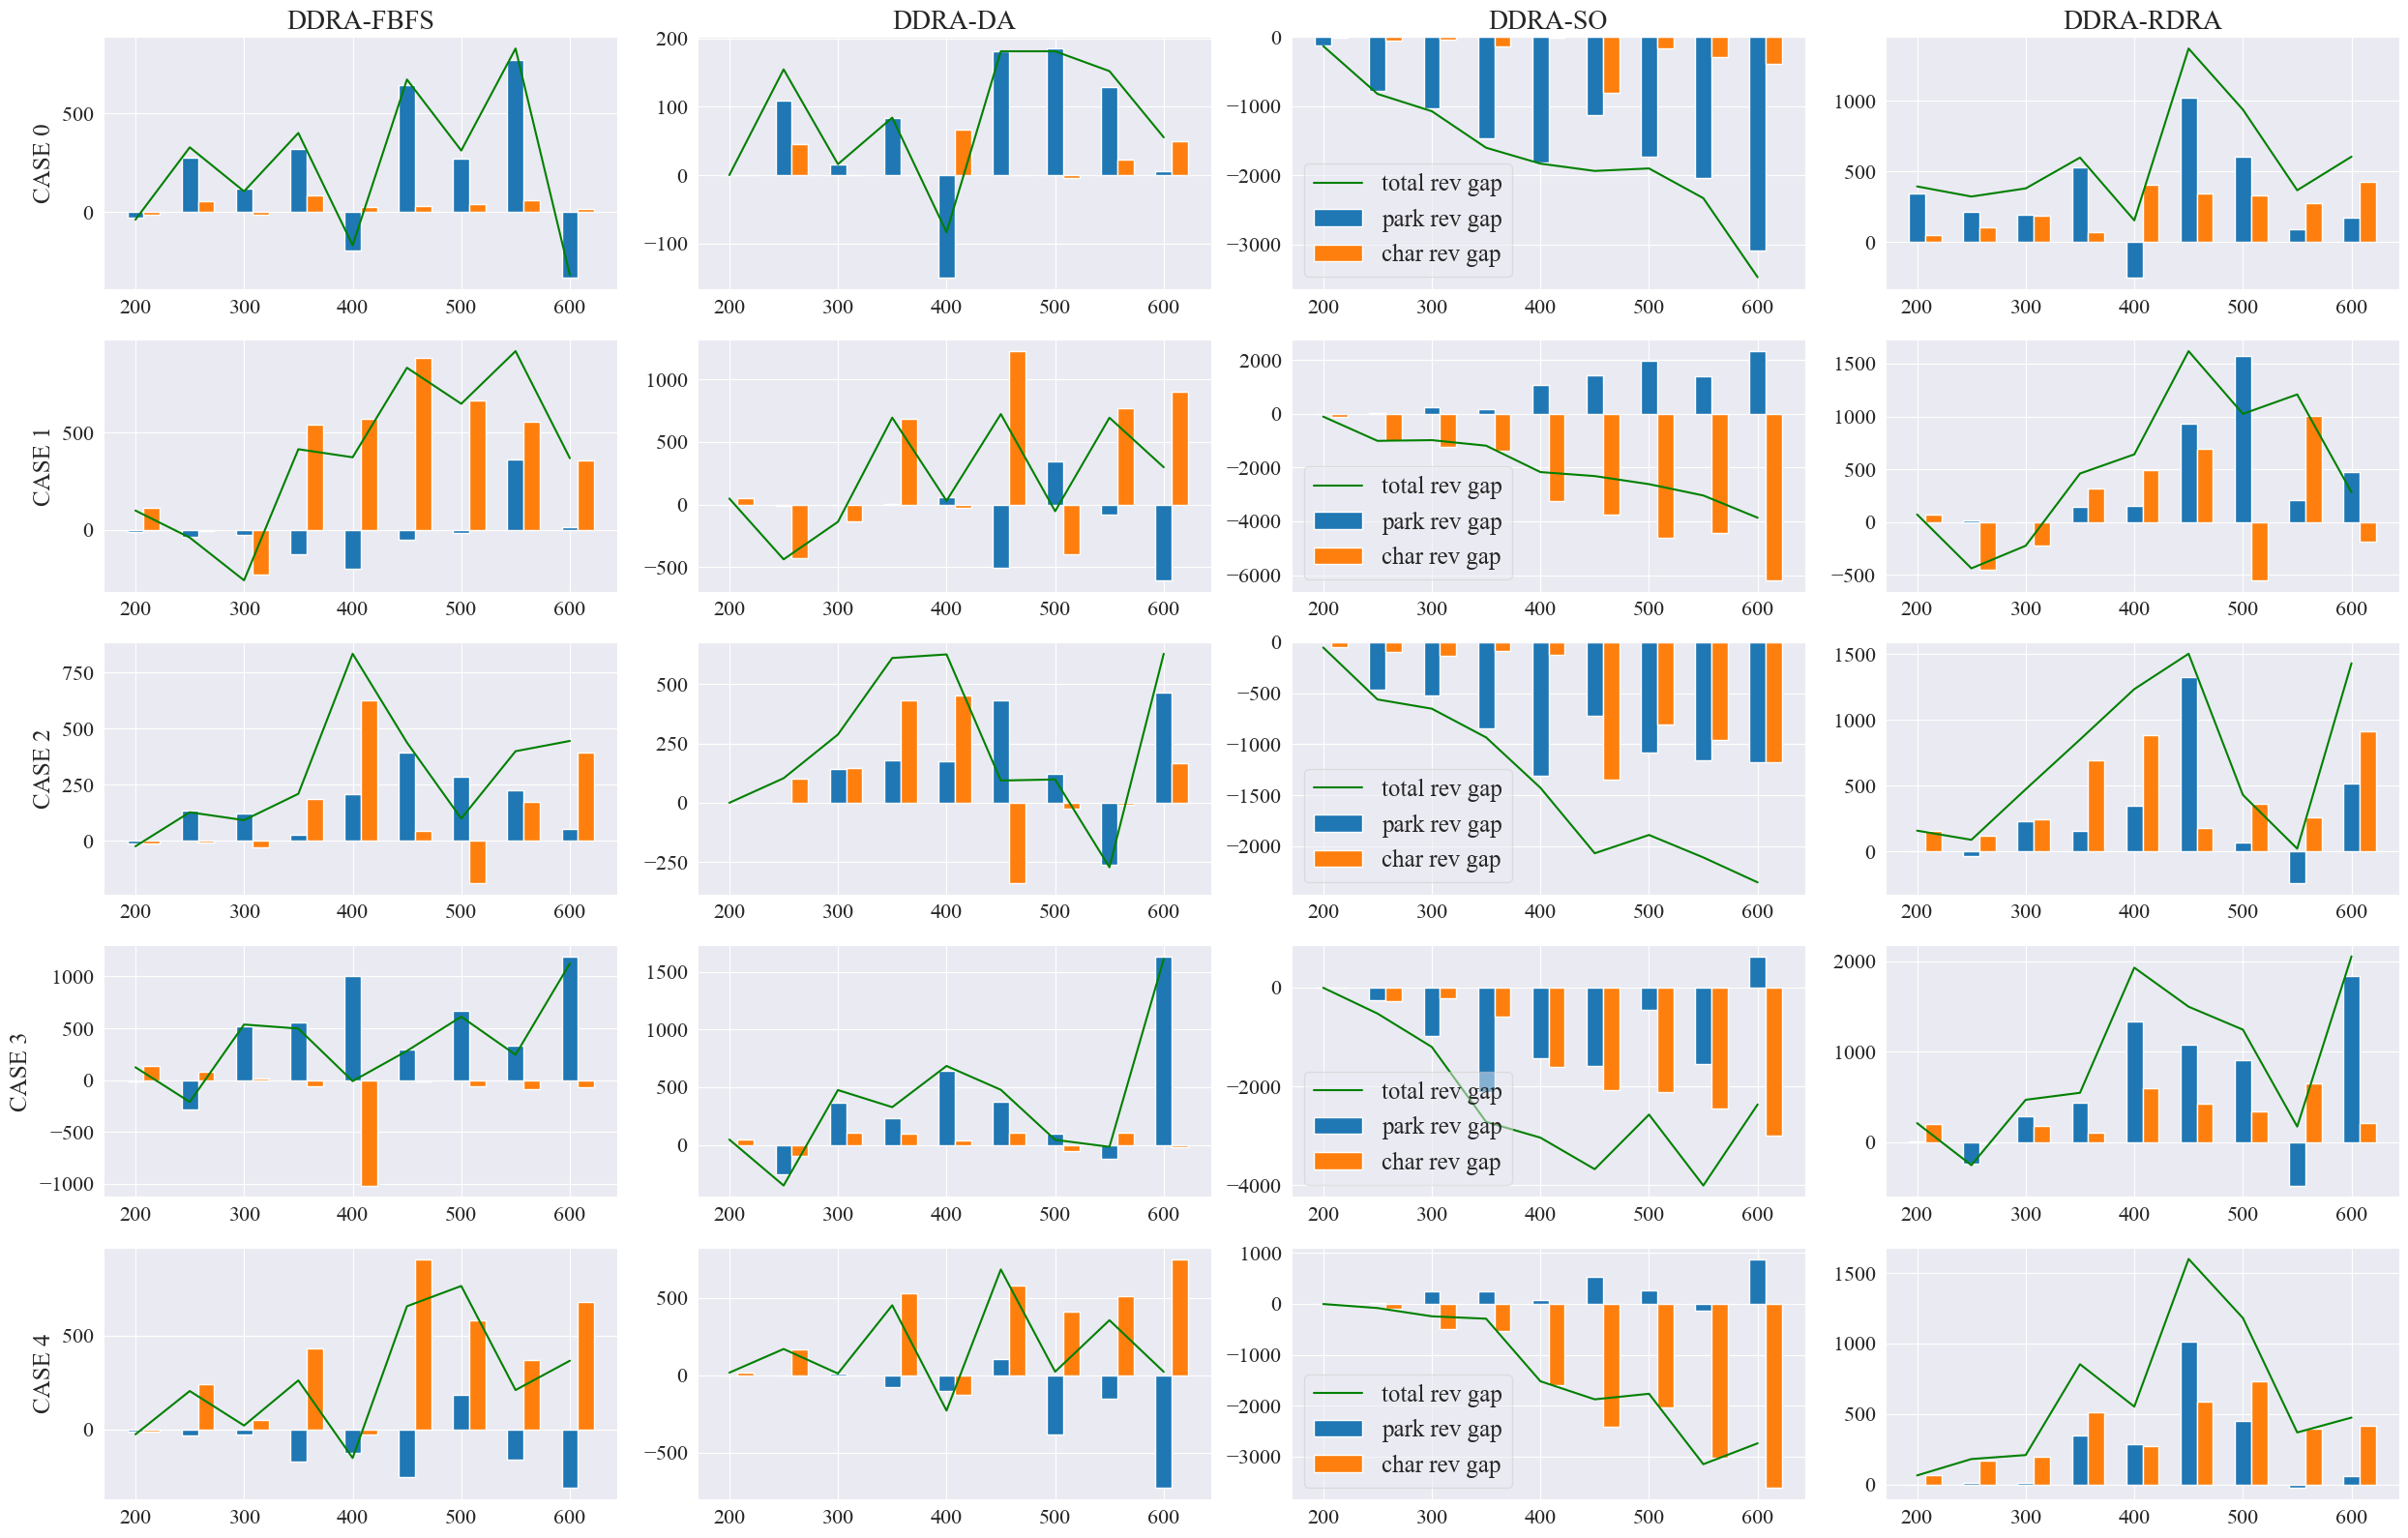

In [132]:
# 每行是不同模型的对比
# 每列是每种共享策略的对比
fig, axes = plt.subplots(5,4,figsize=(25,16))

model_li = ['fbfs','dp','so','unp-rdp']

for i in range(5):
    rdp_i = result_info['rdp'][f'rdp_{i}']
    for j in range(4):
        model_j = model_li[j]
        axes[i,j].bar(x,[rdp_i['park revenue'][k][1]-result_info[model_j][model_j+f'_{i}']['park revenue'][k][1] for k in range(9)],width=15,label='park rev gap')
        axes[i,j].bar([x[i]+15 for i in range(len(x))],[rdp_i['char revenue'][k][1]-result_info[model_j][model_j+f'_{i}']['char revenue'][k][1] for k in range(9)],width=15,label='char rev gap')
        axes[i,j].plot(x,[rdp_i['total revenue'][k][1]-result_info[model_j][model_j+f'_{i}']['total revenue'][k][1] for k in range(9)],color='green',label='total rev gap')

        axes[i,j].set_xticks([i for i in range(200,601,100)])
        axes[i,j].set_xticklabels([i for i in range(200,601,100)],fontsize=16)
        axes[i,j].yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
        # axes[i,j].ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
        axes[i,j].tick_params(axis='y', labelsize=16)

        if i == 0:
             axes[i,j].set_title(f'DDRA-{label_map[model_j]}',fontsize=20)
        if j == 0:
             axes[i,j].set_ylabel(f'CASE {i}',fontsize=18)

    axes[i,2].legend(framealpha=0.5,fontsize=18)
plt.tight_layout()
plt.savefig(r"G:\纵向\小论文\共享停车和充电分配模型\analysis\model_case_revenue_gap_new.png",dpi=500)
plt.show()

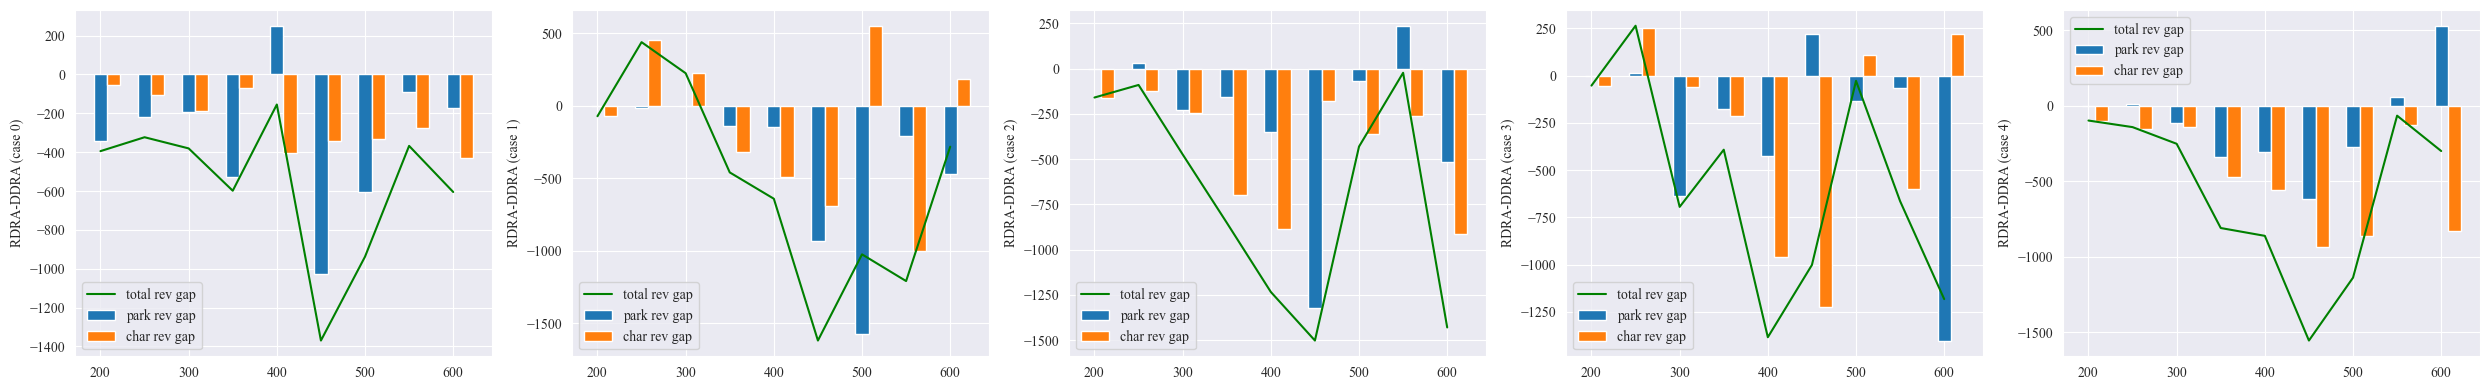

In [25]:
# fig, axes = plt.subplots(1,5,figsize=(25,4))
#
# for j in range(5):
#     unp_rdp_i = result_info['unp-rdp'][f'unp-rdp_{j}']
#     axes[j].bar(x,[unp_rdp_i['park revenue'][k][1]-result_info['rdp']['rdp'+f'_{j}']['park revenue'][k][1] for k in range(9)],width=15,label='park rev gap')
#     axes[j].bar([x[i]+15 for i in range(len(x))],[unp_rdp_i['char revenue'][k][1]-result_info['rdp']['rdp'+f'_{j}']['char revenue'][k][1] for k in range(9)],width=15,label='char rev gap')
#     axes[j].plot(x,[unp_rdp_i['total revenue'][k][1]-result_info['rdp']['rdp'+f'_{j}']['total revenue'][k][1] for k in range(9)],color='green',label='total rev gap')
#     axes[j].set_ylabel(f'RDRA-DDRA (case {j})')
#     axes[j].legend()
# plt.tight_layout()
# plt.savefig(r"G:\纵向\小论文\共享停车和充电分配模型\analysis\RDA_model_case_revenue_gap.png",dpi=300)
# plt.show()

In [114]:
from matplotlib.ticker import FormatStrFormatter

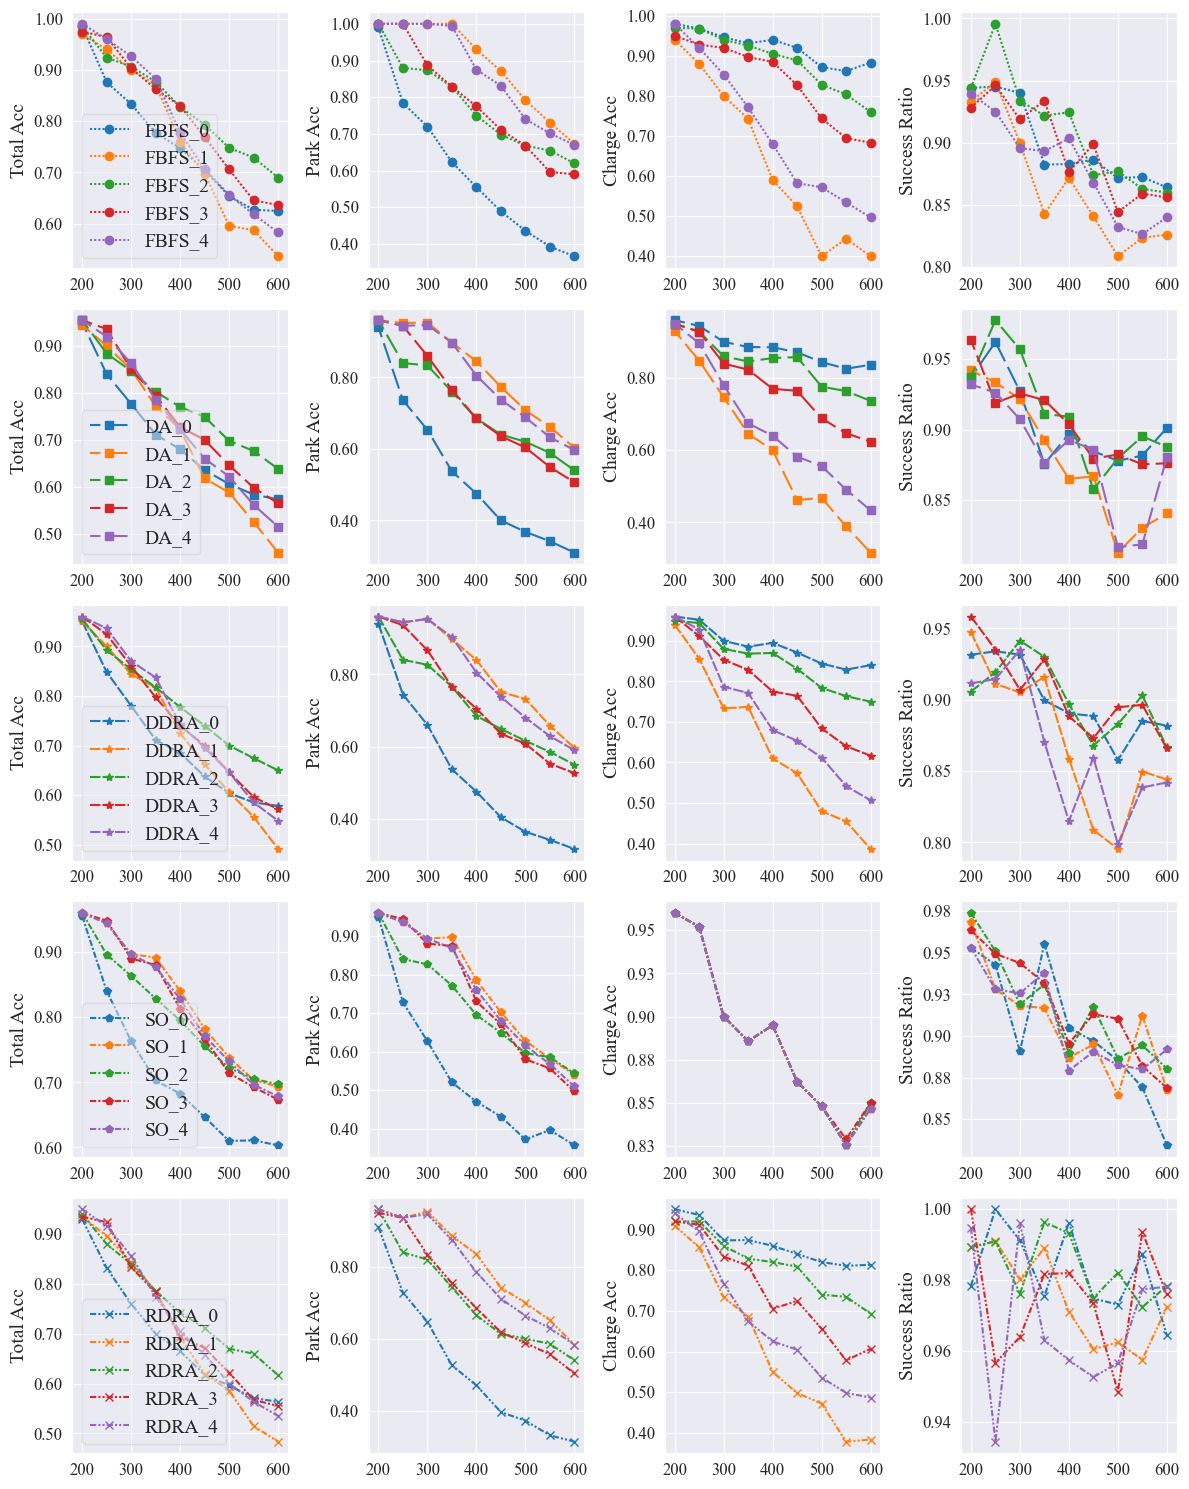

In [116]:
fig,axes = plt.subplots(5,4,figsize=(12,15))

label_list = ['Total Acc','Park Acc','Charge Acc','Success Ratio']

for i,rule in enumerate(result_info.keys()):
    for j,key in enumerate(['acc','park acc','charge acc','success ratio']):
        for k,version in enumerate(result_info[rule].keys()):
            values = [value[1] for value in result_info[rule][version][key]]
            axes[i,j].plot(x,values,label=f'{label_map[rule]}_{k}',linestyle=linestyle_tuple[i][1],marker=mark_list[i])
        axes[i,j].set_ylabel(label_list[j],fontsize=14)
        axes[i,j].set_xticks([i for i in range(200,601,100)])
        axes[i,j].set_xticklabels([i for i in range(200,601,100)],fontsize=12)
        axes[i,j].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))  # 保留两位小数
        axes[i,j].tick_params(axis='y', labelsize=12)
        # axes[i,j].tick_params(axis='x', labelsize=12)
    axes[i,0].legend(fontsize=14,framealpha=0.5)
plt.tight_layout()
plt.savefig(r"G:\纵向\小论文\共享停车和充电分配模型\analysis\model_case_acc_new.png",dpi=300)
plt.show()

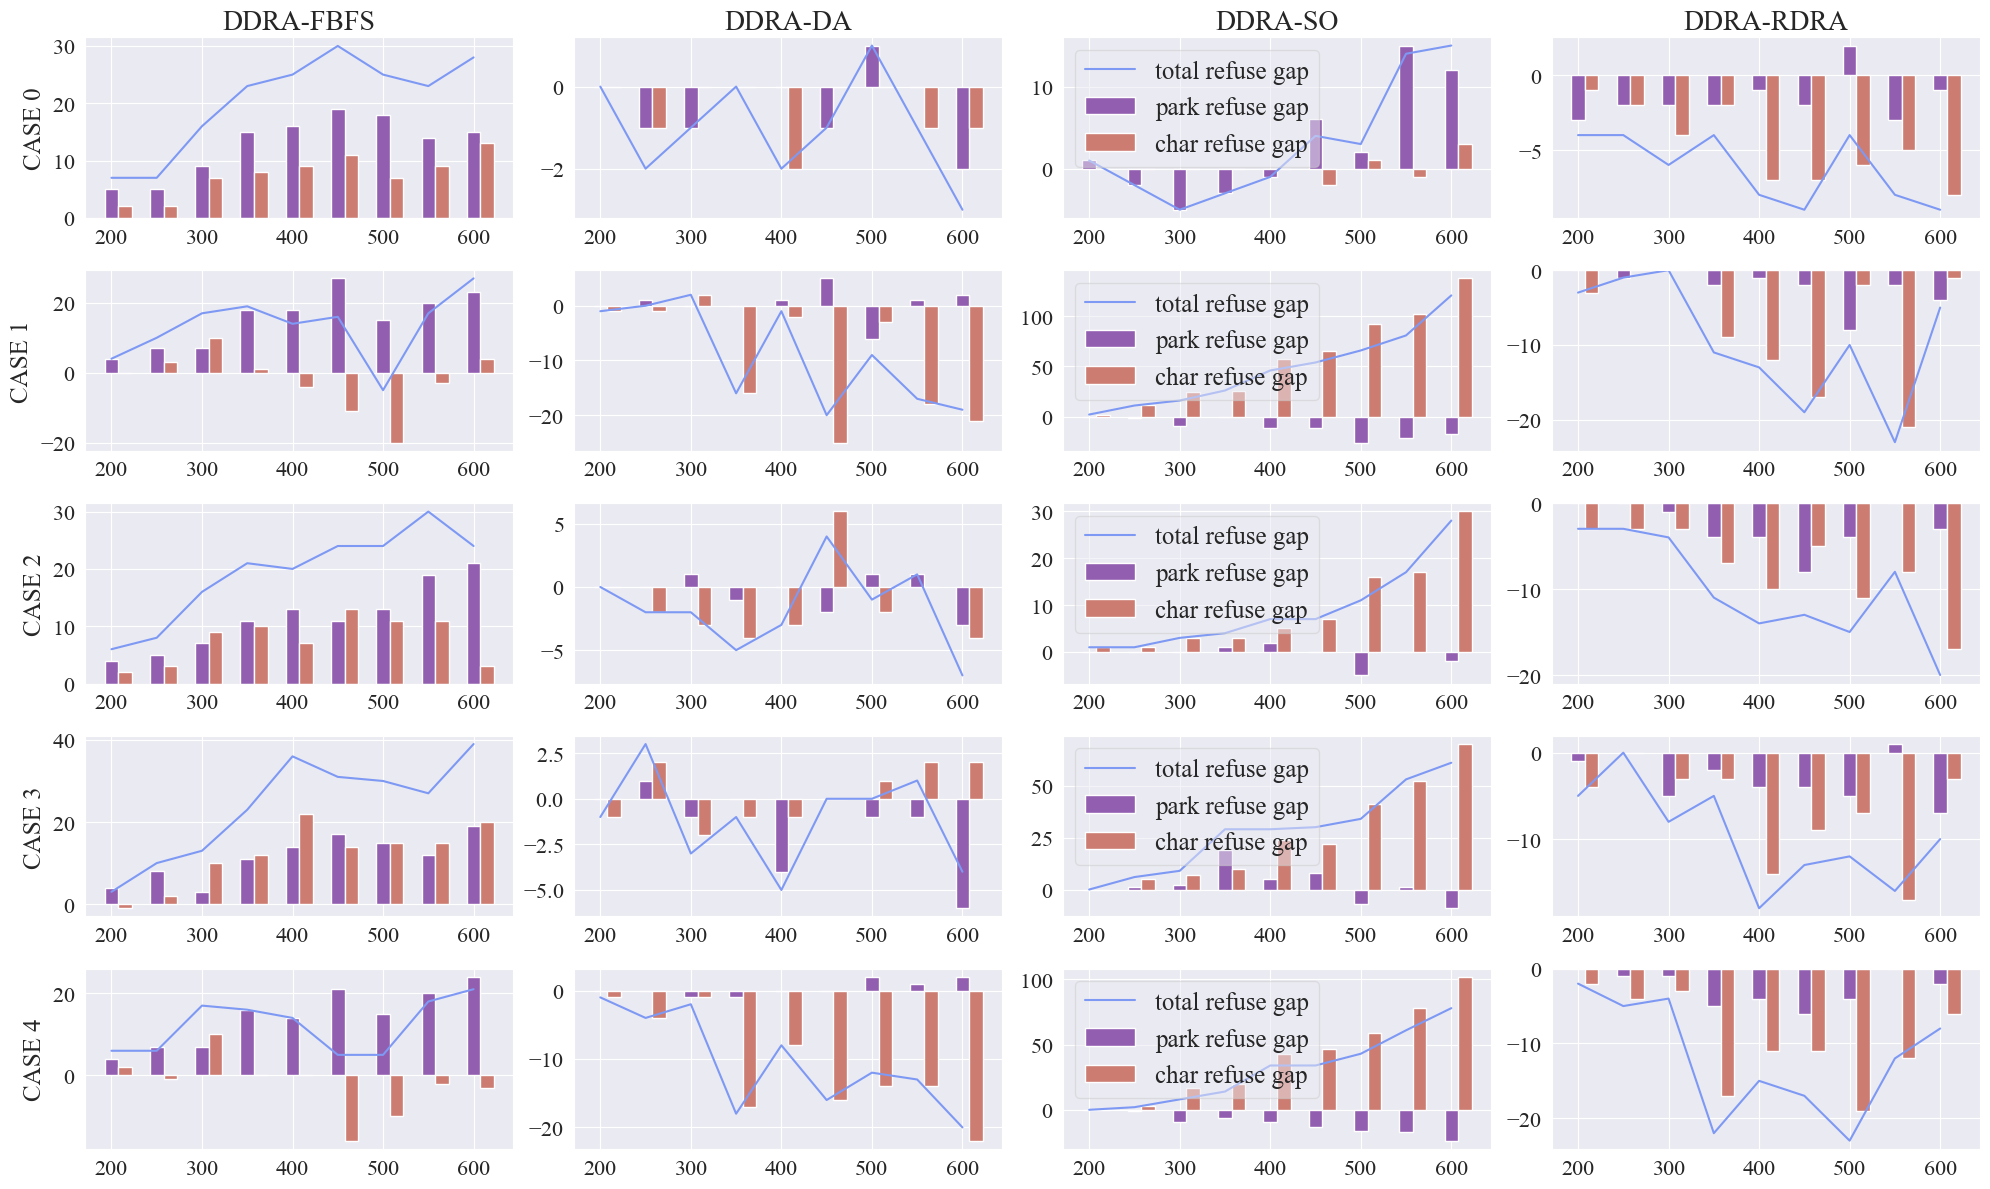

In [139]:
# 每行是不同模型的对比
# 每列是每种共享策略的对比
fig, axes = plt.subplots(5,4,figsize=(20,12))
model_li = ['fbfs','dp','so','unp-rdp']
for i in range(5):
    rdp_i = result_info['rdp'][f'rdp_{i}']
    for j in range(4):
        model_j = model_li[j]
        axes[i,j].bar(x,[rdp_i['refuse park number'][k][1]-result_info[model_j][model_j+f'_{i}']['refuse park number'][k][1] for k in range(9)],width=15,label='park refuse gap',color='#925EB0')
        axes[i,j].bar([x[i]+15 for i in range(len(x))],[rdp_i['refuse char number'][k][1]-result_info[model_j][model_j+f'_{i}']['refuse char number'][k][1] for k in range(9)],width=15,label='char refuse gap',color='#CC7C71')
        axes[i,j].plot(x,[rdp_i['refuse number'][k][1]-result_info[model_j][model_j+f'_{i}']['refuse number'][k][1] for k in range(9)],color='#7E99F4',label='total refuse gap')
        axes[i,j].set_xticks([i for i in range(200,601,100)])
        axes[i,j].set_xticklabels([i for i in range(200,601,100)],fontsize=16)
        axes[i,j].yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
        # axes[i,j].ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
        axes[i,j].tick_params(axis='y', labelsize=16)

        if i == 0:
             axes[i,j].set_title(f'DDRA-{label_map[model_j]}',fontsize=20)
        if j == 0:
             axes[i,j].set_ylabel(f'CASE {i}',fontsize=18)

    axes[i,2].legend(framealpha=0.5,fontsize=18)

plt.tight_layout()
plt.savefig(r"G:\纵向\小论文\共享停车和充电分配模型\analysis\model_case_acc_gap_new.png",dpi=500)
plt.show()

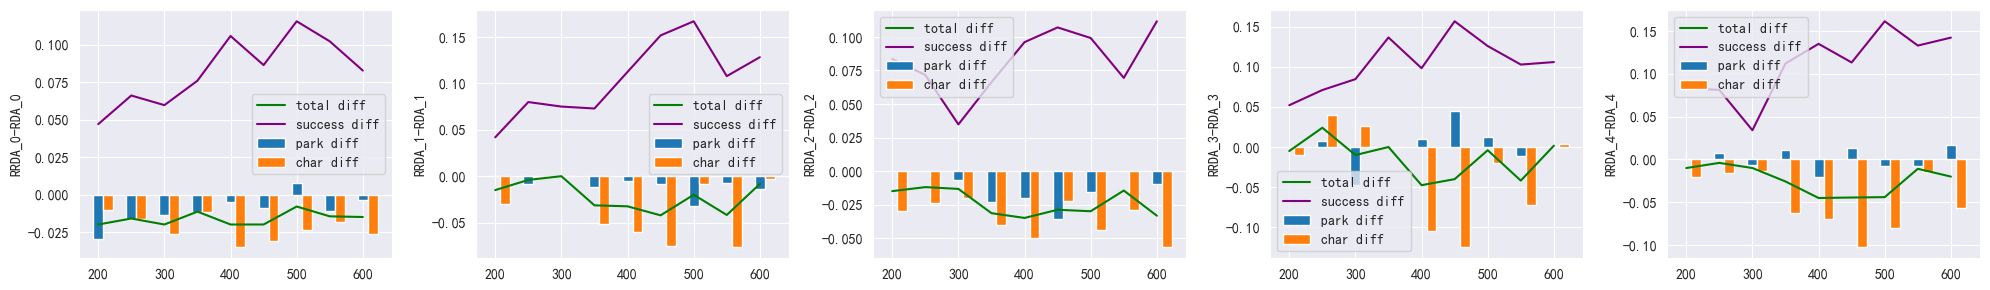

In [207]:
# fig, axes = plt.subplots(1,5,figsize=(20,3))
#
# for j in range(5):
#     unp_rdp_i = result_info['unp-rdp'][f'unp-rdp_{j}']
#     axes[j].bar(x,[unp_rdp_i['park acc'][k][1]-result_info['rdp']['rdp'+f'_{j}']['park acc'][k][1] for k in range(9)],width=15,label='park diff')
#     axes[j].bar([x[i]+15 for i in range(len(x))],[unp_rdp_i['charge acc'][k][1]-result_info['rdp']['rdp'+f'_{j}']['charge acc'][k][1] for k in range(9)],width=15,label='char diff')
#     axes[j].plot(x,[unp_rdp_i['acc'][k][1]-result_info['rdp']['rdp'+f'_{j}']['acc'][k][1] for k in range(9)],color='green',label='total diff')
#     axes[j].plot(x,[unp_rdp_i['success ratio'][k][1]-result_info['rdp']['rdp'+f'_{j}']['success ratio'][k][1] for k in range(9)],color='purple',label='success diff')
#     axes[j].set_ylabel(f'RRDA_{j}-RDA_{j}')
#     axes[j].legend()
#
# plt.tight_layout()
# plt.show()

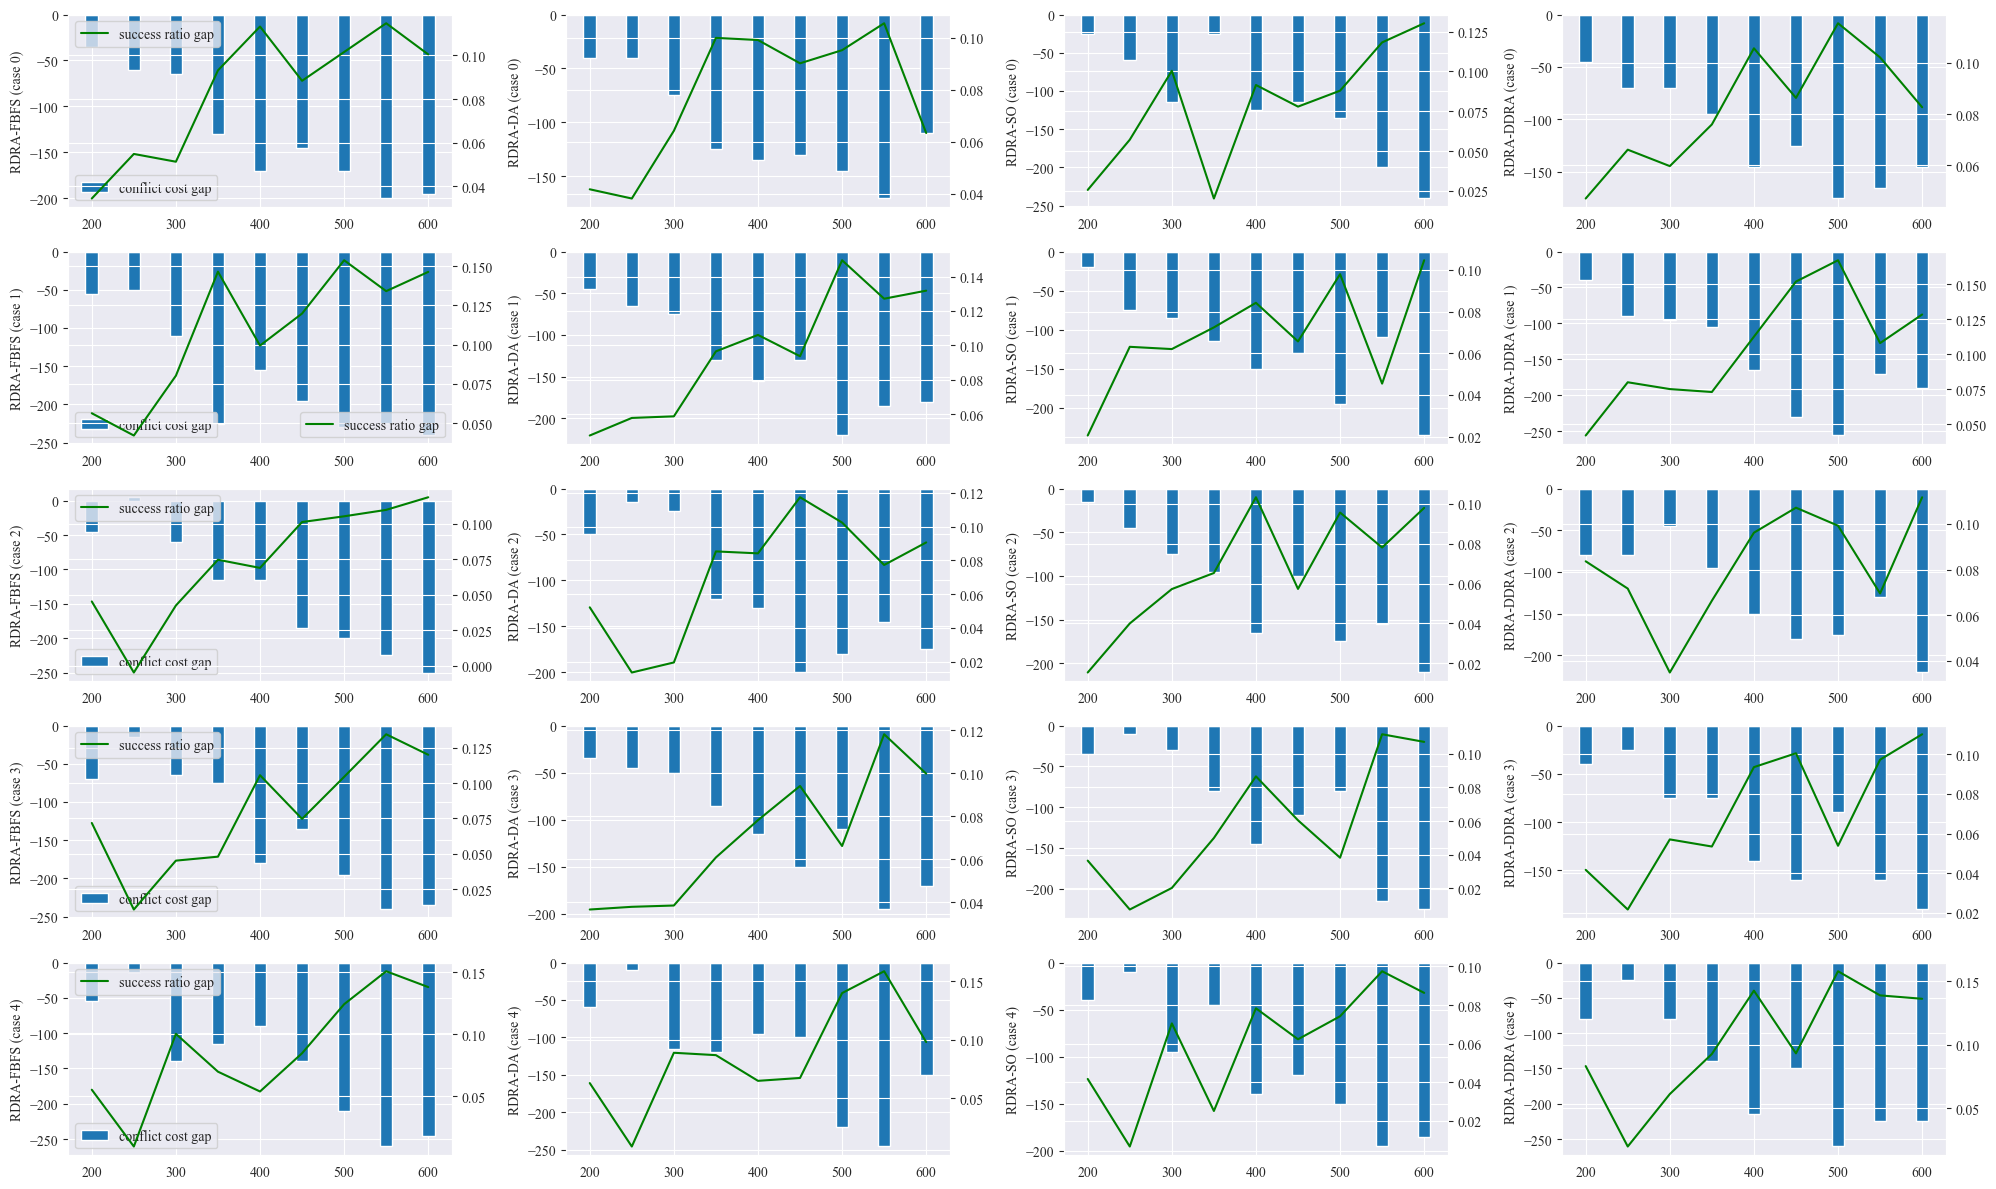

In [121]:
# 每行是不同模型的对比
# 每列是每种共享策略的对比
fig, axes = plt.subplots(5,4,figsize=(20,12))
model_li = ['fbfs','dp','so','rdp']
for i in range(5):
    rdp_i = result_info['unp-rdp'][f'unp-rdp_{i}']
    for j in range(4):
        model_j = model_li[j]
        axes[i,j].bar(x,[rdp_i['conflict cost'][k][1]-result_info[model_j][model_j+f'_{i}']['conflict cost'][k][1] for k in range(9)],width=15,label='conflict cost gap')
        temp_ax = axes[i,j].twinx()
        temp_ax.plot(x,[rdp_i['success ratio'][k][1]-result_info[model_j][model_j+f'_{i}']['success ratio'][k][1] for k in range(9)],color='green',label='success ratio gap')
        axes[i,j].set_ylabel(f'RDRA-{label_map[model_j]} (case {i})')
        if j == 0:
            temp_ax.legend()
    axes[i,0].legend()

plt.tight_layout()
plt.savefig(r"G:\纵向\小论文\共享停车和充电分配模型\analysis\model_case_conflict&success_gap.png",dpi=500)
plt.show()

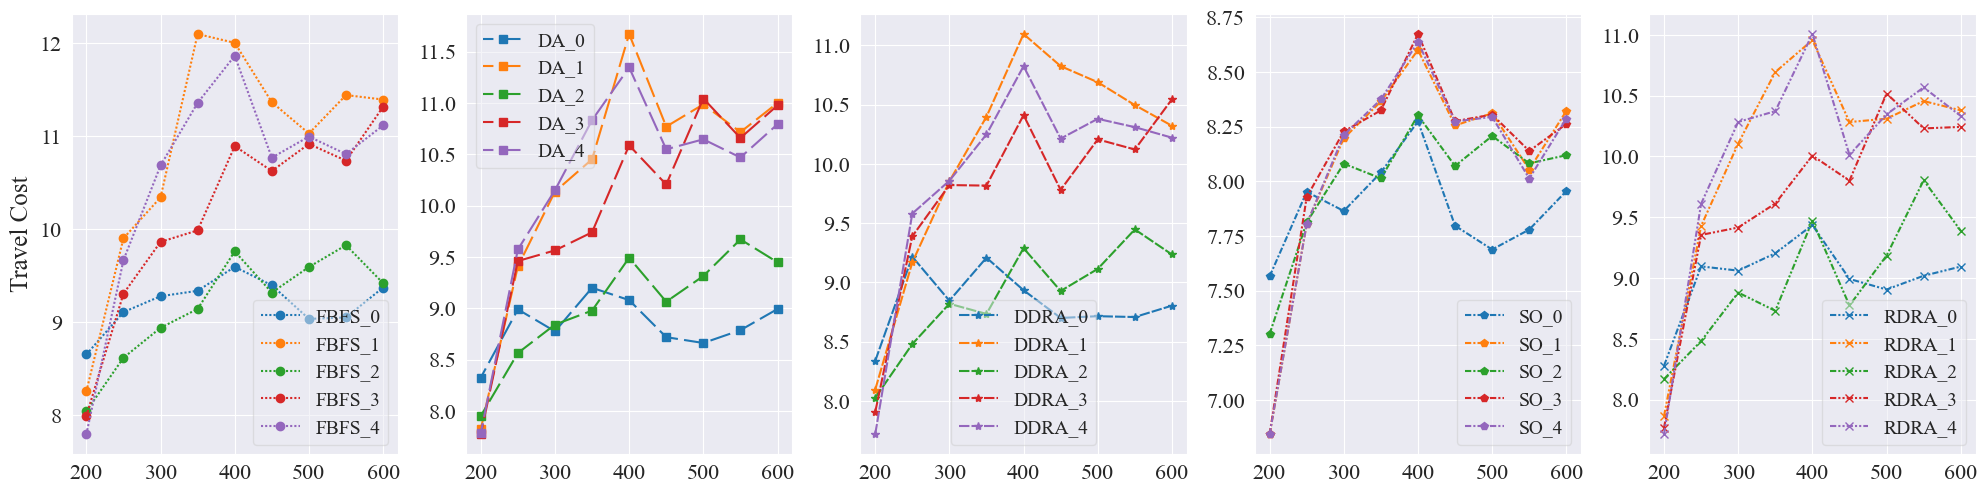

In [171]:
fig,axes = plt.subplots(1,5,figsize=(20,5))

for i,rule in enumerate(result_info.keys()):
    for k,version in enumerate(result_info[rule].keys()):
        values = [value[1] for value in result_info[rule][version]['travel cost']]
        axes[i].plot(x,values,label=f'{label_map[rule]}_{k}',linestyle=linestyle_tuple[i][1],marker=mark_list[i])
    axes[i].set_xticks([i for i in range(200,601,100)])
    axes[i].set_xticklabels([i for i in range(200,601,100)],fontsize=16)
    axes[i].tick_params(axis='y', labelsize=16)
    axes[i].legend(fontsize=14,framealpha=0.5)
axes[0].set_ylabel('Travel Cost',fontsize=18)
plt.tight_layout()
plt.savefig(r"G:\纵向\小论文\共享停车和充电分配模型\analysis\model_case_travel_new.png",dpi=500)
plt.show()

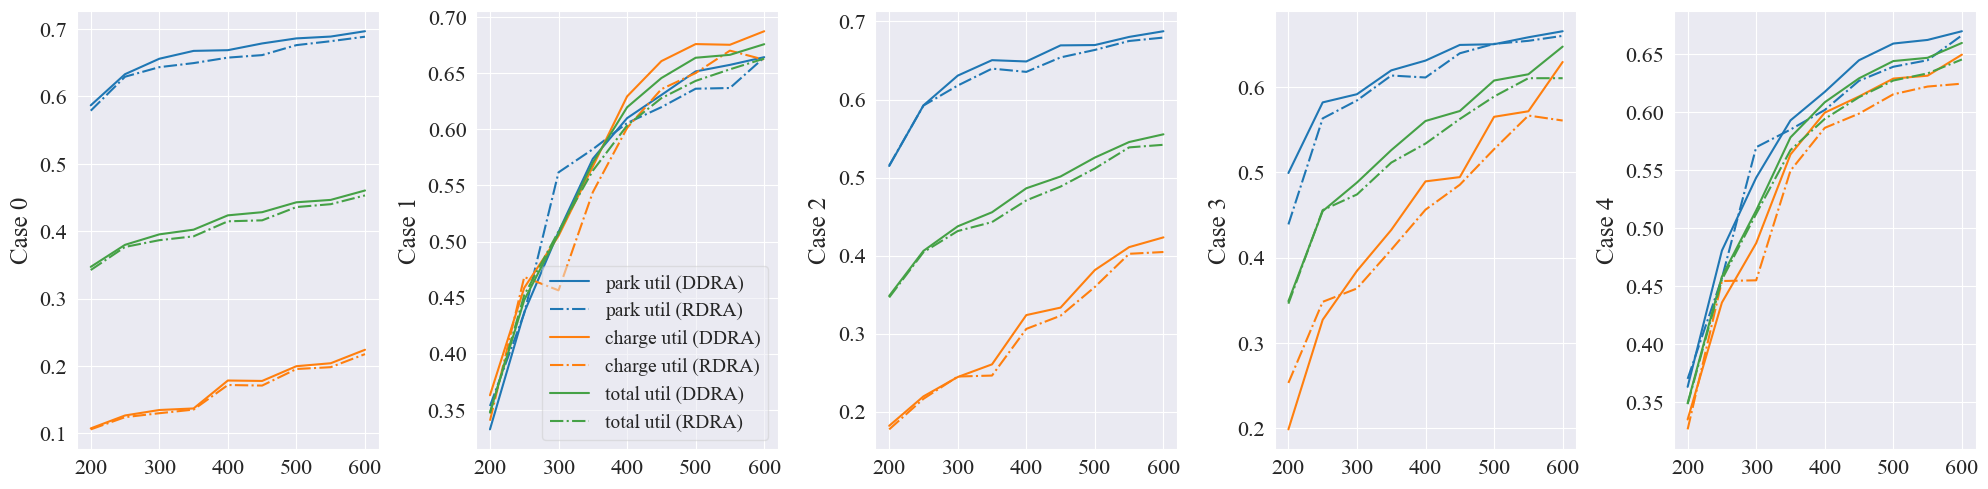

In [170]:
fig,axes = plt.subplots(1,5,figsize=(20,5))

util_li = ['park util','charge util','total util']

x = [i*2 for i in range(100,325,25)]

for j in range(5):
    rdp_snk = snk_info['rdp'][f'rdp_{j}']
    unp_rdp_snk = snk_info['unp-rdp'][f'unp-rdp_{j}']
    for i in range(3):
        util_i = util_li[i]
        if i == 0:
            axes[j].plot(x,[1-rdp_snk[k][1][ops,:96].sum()/(50*96) for k in range(9)],color='#1f77b4',label=f'{util_i} (DDRA)',linestyle='-')
            axes[j].plot(x,[1-unp_rdp_snk[k][1][ops,:96].sum()/(50*96) for k in range(9)],color='#1f77b4',label=f'{util_i} (RDRA)',linestyle='-.')
        elif i == 1:
            axes[j].plot(x,[1-rdp_snk[k][1][cps,:96].sum()/(50*96) for k in range(9)],color='#ff7f0e',label=f'{util_i} (DDRA)',linestyle='-')
            axes[j].plot(x,[1-unp_rdp_snk[k][1][cps,:96].sum()/(50*96) for k in range(9)],color='#ff7f0e',label=f'{util_i} (RDRA)',linestyle='-.')
        else:
            axes[j].plot(x,[1-rdp_snk[k][1][:,:96].sum()/(100*96) for k in range(9)],color='#45a146',label=f'{util_i} (DDRA)',)
            axes[j].plot(x,[1-unp_rdp_snk[k][1][:,:96].sum()/(100*96) for k in range(9)],color='#45a146',label=f'{util_i} (RDRA)',linestyle='-.')

    axes[j].set_xticks([i for i in range(200,601,100)])
    axes[j].set_xticklabels([i for i in range(200,601,100)],fontsize=16)
    axes[j].tick_params(axis='y', labelsize=16)

    axes[j].set_ylabel(f'Case {j}',fontsize=18)

    if j == 1:
        axes[j].legend(fontsize=14,framealpha=0.5)

plt.tight_layout()
plt.savefig(r"G:\纵向\小论文\共享停车和充电分配模型\analysis\model_case_util_new.png",dpi=500)
plt.show()

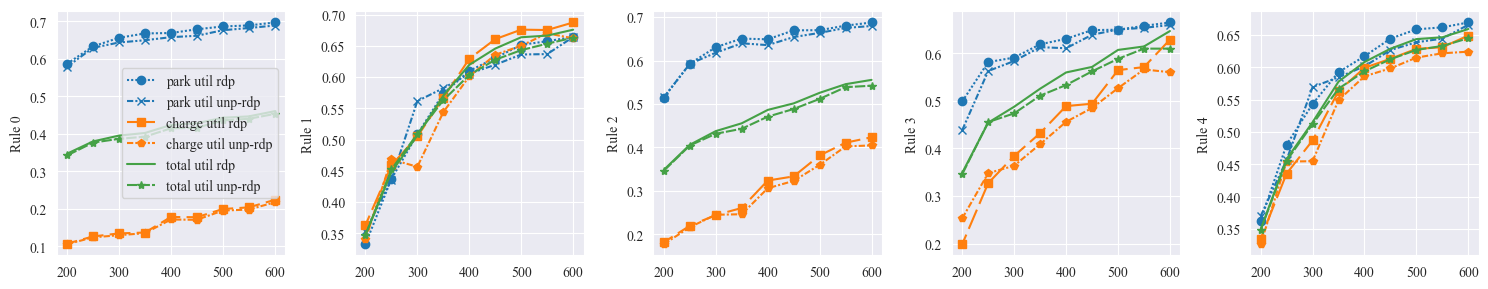

In [29]:
fig,axes = plt.subplots(1,5,figsize=(15,3))

util_li = ['park util','charge util','total util']

for j in range(5):
    rdp_ = result_info['rdp'][f'rdp_{j}']
    unp_rdp_ = result_info['unp-rdp'][f'unp-rdp_{j}']
    for i in range(3):
        util_i = util_li[i]
        if i == 0:
            axes[j].plot(x,[1-rdp_['park util'][k][1] for k in range(9)],color='#1f77b4',label=f'{util_i} rdp',linestyle=linestyle_tuple[i][1],marker=mark_list[i])
            axes[j].plot(x,[1-unp_rdp_['park util'][k][1] for k in range(9)],color='#1f77b4',label=f'{util_i} unp-rdp',linestyle=linestyle_tuple[-i-1][1],marker=mark_list[-i-1])
        elif i == 1:
            axes[j].plot(x,[1-rdp_['charge util'][k][1] for k in range(9)],color='#ff7f0e',label=f'{util_i} rdp',linestyle=linestyle_tuple[i][1],marker=mark_list[i])
            axes[j].plot(x,[1-unp_rdp_['charge util'][k][1] for k in range(9)],color='#ff7f0e',label=f'{util_i} unp-rdp',linestyle=linestyle_tuple[-i-1][1],marker=mark_list[-i-1])
        else:
            axes[j].plot(x,[1-(rdp_['park util'][k][1]+rdp_['charge util'][k][1])/2 for k in range(9) ],color='#45a146',label=f'{util_i} rdp',)
            axes[j].plot(x,[1-(unp_rdp_['park util'][k][1]+unp_rdp_['charge util'][k][1])/2 for k in range(9) ],color='#45a146',label=f'{util_i} unp-rdp',linestyle=linestyle_tuple[-i-1][1],marker=mark_list[-i-1])
            # axes[j].plot(x,[rdp_['total util'][k][1] for k in range(9) ],color='green',label=f'{util_i} rdp',)
            # axes[j].plot(x,[unp_rdp_['total util'][k][1] for k in range(9)],color='green',label=f'{util_i} unp-rdp',linestyle=linestyle_tuple[-i-1][1],marker=mark_list[-i-1])
    axes[j].set_ylabel(f'Rule {j}')
    if j == 0:
        axes[j].legend()

plt.tight_layout()
plt.show()

In [150]:
result_info['rdp']['rdp_1']['park util']

[(100, 0.6675),
 (125, 0.563125),
 (150, 0.49145833333333333),
 (175, 0.42625),
 (200, 0.39),
 (225, 0.369375),
 (250, 0.34833333333333333),
 (275, 0.3425),
 (300, 0.335625)]

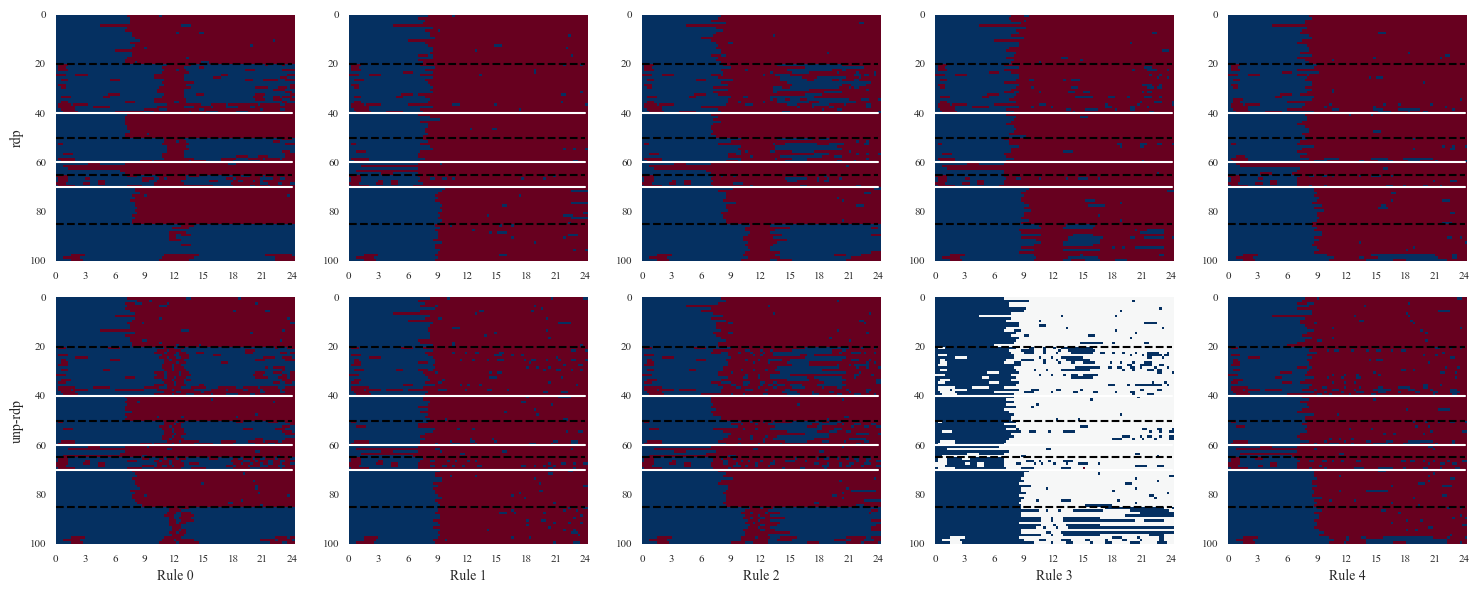

In [124]:
# 热力图
line_list = ['--','-.','-']
x_heat = list(np.arange(0,97,4))
y_heat = list(np.arange(0,101,20))

fig,axes = plt.subplots(2,5,figsize=(15,6))
rule_list = ['rdp','unp-rdp']
for i,rule in enumerate(rule_list):  # imax = 2
    for j,version in enumerate(snk_info[rule].keys()): # jmax = 5
       f = snk_info[rule][version][-1][1]  # 需求400的热力图
       sns.heatmap(data=f[:,:97],ax=axes[i,j],cmap="RdBu",square=True,cbar=False)
       axes[i,j].set_xticks(x_heat[::3])
       axes[i,j].set_xticklabels([int(k/4) for k in x_heat][::3],rotation=0,fontsize=8)
       axes[i,j].set_yticks(y_heat)
       axes[i,j].set_yticklabels(y_heat,rotation=0,fontsize=8)
       axes[i,j].plot(x_heat,[20]*25,linestyle=line_list[0],color='black')
       axes[i,j].plot(x_heat,[40]*25,linestyle=line_list[2],color='white')
       axes[i,j].plot(x_heat,[50]*25,linestyle=line_list[0],color='black')
       axes[i,j].plot(x_heat,[60]*25,linestyle=line_list[2],color='white')
       axes[i,j].plot(x_heat,[65]*25,linestyle=line_list[0],color='black')
       axes[i,j].plot(x_heat,[70]*25,linestyle=line_list[2],color='white')
       axes[i,j].plot(x_heat,[85]*25,linestyle=line_list[0],color='black')

       if j == 0:
          axes[i,j].set_ylabel('{}'.format(rule_list[i]))

       if i == 1:
            axes[i,j].set_xlabel(f'Rule {j}')

plt.tight_layout()
plt.show()

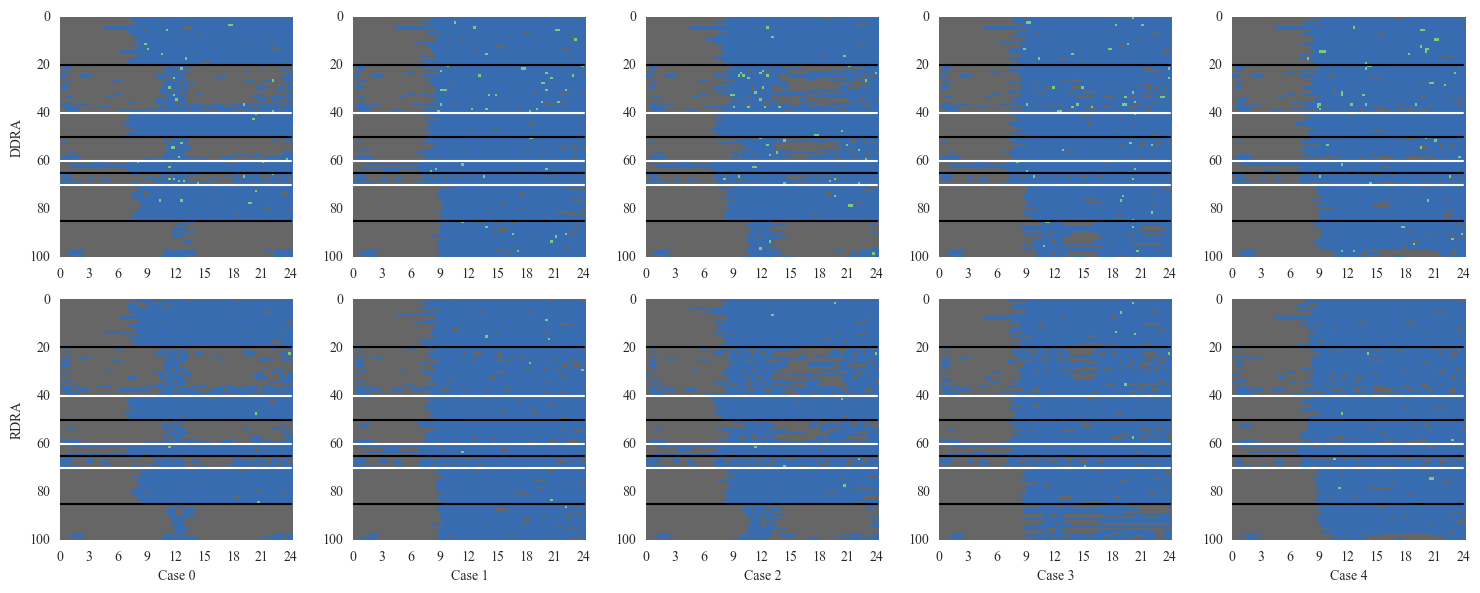

In [126]:
# 热力图
line_list = ['--','-.','-']
x_heat = list(np.arange(0,97,4))
y_heat = list(np.arange(0,101,20))

fig,axes = plt.subplots(2,5,figsize=(15,6))
for i,rule in enumerate(['ardp','aunp-rdp']):  # imax = 3
    for j,version in enumerate(list(snka_info[rule].keys())): # jmax = 2
       f = snka_info[rule][version][-1][1]  # 需求400的热力图
       sns.heatmap(data=f[:,:97],ax=axes[i,j],cmap="Accent",square=True,cbar=False)
       axes[i,j].set_xticks(x_heat[::3])
       axes[i,j].set_xticklabels([int(k/4) for k in x_heat][::3],rotation=0)
       axes[i,j].set_yticks(y_heat)
       axes[i,j].set_yticklabels(y_heat,rotation=0)
       axes[i,j].grid(True)

       axes[i,j].plot(x_heat,[20]*25,linestyle=line_list[2],color='black')
       axes[i,j].plot(x_heat,[40]*25,linestyle=line_list[2],color='white')
       axes[i,j].plot(x_heat,[50]*25,linestyle=line_list[2],color='black')
       axes[i,j].plot(x_heat,[60]*25,linestyle=line_list[2],color='white')
       axes[i,j].plot(x_heat,[65]*25,linestyle=line_list[2],color='black')
       axes[i,j].plot(x_heat,[70]*25,linestyle=line_list[2],color='white')
       axes[i,j].plot(x_heat,[85]*25,linestyle=line_list[2],color='black')

       if j == 0:
           if i == 0:
                axes[i,j].set_ylabel('DDRA')
           else:
                axes[i,j].set_ylabel('RDRA')

       if i == 1:
            axes[i,j].set_xlabel(f'Case {j}')

plt.tight_layout()
plt.savefig(r"G:\纵向\小论文\共享停车和充电分配模型\analysis\DRA_heatmap.png",dpi=300)
plt.show()

In [140]:
snk_info['unp-rdp']['unp-rdp_3'][0][1].min()

0

In [ ]:
# further details in sharing rule

In [172]:
# 计算每个间隔的收益
base_root = r"G:\2023-纵向\停车分配\save_data_1121\300-1\assign_info"
os.chdir(base_root)
so4_assign = pd.read_csv(base_root+r"\so_4.csv")
so3_assign = pd.read_csv(base_root+r"\so_3.csv")
so2_assign = pd.read_csv(base_root+r"\so_2.csv")
so1_assign = pd.read_csv(base_root+r"\so_1.csv")
so0_assign = pd.read_csv(base_root+r"\so_0.csv")

rdp0_assign = pd.read_csv(base_root+r"\unp-rdp_0.csv")
rdp1_assign = pd.read_csv(base_root+r"\unp-rdp_1.csv")
rdp2_assign = pd.read_csv(base_root+r"\unp-rdp_2.csv")
rdp3_assign = pd.read_csv(base_root+r"\unp-rdp_3.csv")
rdp4_assign = pd.read_csv(base_root+r"\unp-rdp_4.csv")

so4_assign = so4_assign[['request_interval', 'revenue', 'label']].groupby(
    ['request_interval', 'label']).sum().reset_index()
so3_assign = so3_assign[['request_interval', 'revenue', 'label']].groupby(
    ['request_interval', 'label']).sum().reset_index()
so2_assign = so2_assign[['request_interval', 'revenue', 'label']].groupby(
    ['request_interval', 'label']).sum().reset_index()
so1_assign = so1_assign[['request_interval', 'revenue', 'label']].groupby(
    ['request_interval', 'label']).sum().reset_index()
so0_assign = so0_assign[['request_interval', 'revenue', 'label']].groupby(
    ['request_interval', 'label']).sum().reset_index()

rdp0_assign = rdp0_assign[['request_interval', 'revenue', 'label']].groupby(
    ['request_interval', 'label']).sum().reset_index()
rdp2_assign = rdp2_assign[['request_interval', 'revenue', 'label']].groupby(
    ['request_interval', 'label']).sum().reset_index()
rdp1_assign = rdp1_assign[['request_interval', 'revenue', 'label']].groupby(
    ['request_interval', 'label']).sum().reset_index()
rdp3_assign = rdp3_assign[['request_interval', 'revenue', 'label']].groupby(
    ['request_interval', 'label']).sum().reset_index()
rdp4_assign = rdp4_assign[['request_interval', 'revenue', 'label']].groupby(
    ['request_interval', 'label']).sum().reset_index()

max_assign_t = max(max(so4_assign['request_interval']), max(rdp4_assign['request_interval']))


temp_dt = pd.DataFrame(columns=['request_interval', 'label'])
temp_dt['request_interval'] = [i for i in range(max_assign_t + 1) for _ in range(2)]
temp_dt['label'] = [0, 1] * (max_assign_t + 1)
so4_assign = pd.merge(temp_dt, so4_assign, on=['request_interval', 'label'], how='left')
so4_assign.fillna(value=0, inplace=True)
so4_assign_park = so4_assign.loc[so4_assign['label'] == 0]
so4_assign_char = so4_assign.loc[so4_assign['label'] == 1]

so3_assign = pd.merge(temp_dt, so3_assign, on=['request_interval', 'label'], how='left')
so3_assign.fillna(value=0, inplace=True)
so3_assign_park = so3_assign.loc[so3_assign['label'] == 0]
so3_assign_char = so3_assign.loc[so3_assign['label'] == 1]

so2_assign = pd.merge(temp_dt, so2_assign, on=['request_interval', 'label'], how='left')
so2_assign.fillna(value=0, inplace=True)
so2_assign_park = so2_assign.loc[so2_assign['label'] == 0]
so2_assign_char = so2_assign.loc[so2_assign['label'] == 1]

so1_assign = pd.merge(temp_dt, so1_assign, on=['request_interval', 'label'], how='left')
so1_assign.fillna(value=0, inplace=True)
so1_assign_park = so1_assign.loc[so1_assign['label'] == 0]
so1_assign_char = so1_assign.loc[so1_assign['label'] == 1]

so0_assign = pd.merge(temp_dt, so0_assign, on=['request_interval', 'label'], how='left')
so0_assign.fillna(value=0, inplace=True)
so0_assign_park = so0_assign.loc[so0_assign['label'] == 0]
so0_assign_char = so0_assign.loc[so0_assign['label'] == 1]

rdp1_assign = pd.merge(temp_dt, rdp1_assign, on=['request_interval', 'label'], how='left')
rdp1_assign.fillna(value=0, inplace=True)
rdp1_assign_park = rdp1_assign.loc[rdp1_assign['label'] == 0]
rdp1_assign_char = rdp1_assign.loc[rdp1_assign['label'] == 1]

rdp2_assign = pd.merge(temp_dt, rdp2_assign, on=['request_interval', 'label'], how='left')
rdp2_assign.fillna(value=0, inplace=True)
rdp2_assign_park = rdp2_assign.loc[rdp2_assign['label'] == 0]
rdp2_assign_char = rdp2_assign.loc[rdp2_assign['label'] == 1]

rdp3_assign = pd.merge(temp_dt, rdp3_assign, on=['request_interval', 'label'], how='left')
rdp3_assign.fillna(value=0, inplace=True)
rdp3_assign_park = rdp3_assign.loc[rdp3_assign['label'] == 0]
rdp3_assign_char = rdp3_assign.loc[rdp3_assign['label'] == 1]

rdp4_assign = pd.merge(temp_dt, rdp4_assign, on=['request_interval', 'label'], how='left')
rdp4_assign.fillna(value=0, inplace=True)
rdp4_assign_park = rdp4_assign.loc[rdp4_assign['label'] == 0]
rdp4_assign_char = rdp4_assign.loc[rdp4_assign['label'] == 1]

rdp0_assign = pd.merge(temp_dt, rdp0_assign, on=['request_interval', 'label'], how='left')
rdp0_assign.fillna(value=0, inplace=True)
rdp0_assign_park = rdp0_assign.loc[rdp0_assign['label'] == 0]
rdp0_assign_char = rdp0_assign.loc[rdp0_assign['label'] == 1]

In [173]:
line_list = ['--','-.','-']

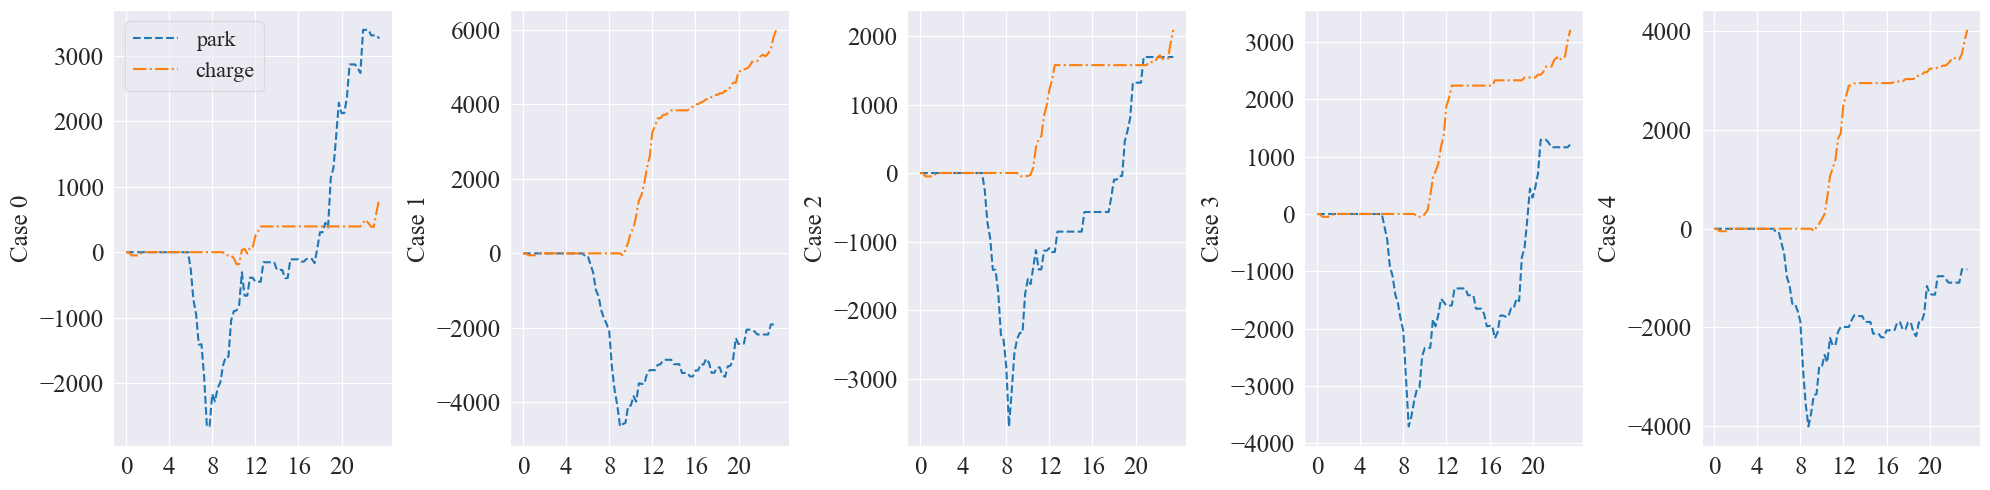

In [184]:
fig,axes = plt.subplots(1,5,figsize=(20,5))

# unrdp_values_li = [[rdp0_assign_park,rdp0_assign_char],[rdp1_assign_park,rdp1_assign_char],[rdp2_assign_park,rdp2_assign_char],[rdp3_assign_park,rdp3_assign_char],[rdp4_assign_park,rdp4_assign_char]]
# sordp_values_li = [[so0_assign_park,so0_assign_char],[so1_assign_park,so1_assign_char],[so2_assign_park,so2_assign_char],[so3_assign_park,so3_assign_char],[so4_assign_park,so4_assign_char]]

labels = ['park','charge']

x_gap = [i for i in range(0,95)]

for i in range(5):
    for k in range(2):
        axes[i].plot(np.cumsum(sordp_values_li[i][k]['revenue'].values-unrdp_values_li[i][k]['revenue'].values),label=f'{labels[k]}',linestyle=line_list[k])
    axes[i].set_xticks(x_gap[::16])
    axes[i].tick_params(axis='y', labelsize=18)
    axes[i].set_ylabel(f'Case {i}',fontsize=18)
    axes[i].set_xticklabels([k for k in range(0,24,4)],fontsize=18)

    if i == 0:
        axes[i].legend(fontsize=16,framealpha=0.5)

plt.tight_layout()
plt.savefig(r"G:\纵向\小论文\共享停车和充电分配模型\analysis\cumsum_so_DRA_new.png",dpi=500)
plt.show()

# sensitivity analysis

In [129]:
# demand/supply and rule 2
"""
停车需求与供给需求变化 duration变化
"""
os.chdir(r"G:\2023-纵向\停车分配\rule2analysis")
os.getcwd()

'G:\\2023-纵向\\停车分配\\rule2analysis'

In [131]:
def load_npy_data(base_dir, skip_folders=None):
    if skip_folders is None:
        skip_folders = []

    merged_data = {'rdp': defaultdict(lambda: defaultdict(list))}

    # 遍历所有的子文件夹
    for root, dirs, files in os.walk(base_dir):
        # 跳过指定的文件夹
        dirs[:] = [d for d in dirs if d not in skip_folders]

        # 检查是否在 result_info 目录下
        if 'result_info' in root:
            folder_name = os.path.basename(os.path.dirname(root))  # 例如 '50-1', '75-1'

            for file in files:
                if file.endswith('.npy'):
                    method = file.split('_')[0]  # 例如 'fbfs', 'dp', 'rdp'
                    method_version = file.split('_')[2]  # 例如 'fbfs_1', 'dp_2'

                    if method in merged_data:
                        file_path = os.path.join(root, file)

                        try:
                            # 加载 .npy 文件内容（是一个字典）
                            npy_data = np.load(file_path, allow_pickle=True).item()
                        except Exception as e:
                            print(f"Error loading {file_path}: {e}")
                            continue  # 跳过出错的文件

                        # 将数据合并到相应的字典中
                        for key, value in npy_data.items():
                            merged_data[method][method_version][key].append((int(folder_name.split('-')[0]), value))

    return merged_data

In [149]:
base_dir = r'G:\2023-纵向\停车分配\rule2analysis\new_pd31'

new_pd_31 = load_npy_data(base_dir)
# 输出记得sort()
for rule in new_pd_31.keys():
    for version in new_pd_31[rule].keys():
        for key in new_pd_31[rule][version].keys():
            new_pd_31[rule][version][key].sort()

In [150]:
xyz_dt = []
for x in new_pd_31['rdp'].keys():
    for yz in new_pd_31['rdp'][x]['total revenue']:
        xyz_dt.append([int(x.split('.')[0]),yz[0],yz[1]])
xyz_dt = np.array(xyz_dt)
xyz_dt

array([[  330. ,    30. , 13992.8],
       [  330. ,    60. , 16510.9],
       [  330. ,    90. , 19137.6],
       [  330. ,   120. , 19441.9],
       [  330. ,   150. , 19874.8],
       [  330. ,   180. , 19040.6],
       [  330. ,   210. , 18137.9],
       [  330. ,   240. , 17086.8],
       [  330. ,   270. , 16303. ],
       [  360. ,    30. , 13992.8],
       [  360. ,    60. , 16501.5],
       [  360. ,    90. , 19131.7],
       [  360. ,   120. , 19985.9],
       [  360. ,   150. , 20178.8],
       [  360. ,   180. , 19226.6],
       [  360. ,   210. , 18867.9],
       [  360. ,   240. , 17256.8],
       [  360. ,   270. , 16518.6],
       [  390. ,    30. , 13992.8],
       [  390. ,    60. , 16359. ],
       [  390. ,    90. , 19131.7],
       [  390. ,   120. , 19656.9],
       [  390. ,   150. , 20586.8],
       [  390. ,   180. , 19647.6],
       [  390. ,   210. , 19169.9],
       [  390. ,   240. , 17554.8],
       [  390. ,   270. , 16733.6],
       [  420. ,    30. , 13

In [151]:
xyz_dt_pac = []
xyz_dt_cac = []
for x in new_pd_31['rdp'].keys():
    for yz in new_pd_31['rdp'][x]['park acc']:
        xyz_dt_pac.append([int(x.split('.')[0]),yz[0],yz[1]])
    for yz in new_pd_31['rdp'][x]['charge acc']:
        xyz_dt_cac.append([int(x.split('.')[0]),yz[0],yz[1]])
xyz_dt_pac = np.array(xyz_dt_pac)
xyz_dt_cac = np.array(xyz_dt_cac)

In [152]:
xyz_dt_pac

array([[3.30000000e+02, 3.00000000e+01, 9.66666667e-01],
       [3.30000000e+02, 6.00000000e+01, 9.50000000e-01],
       [3.30000000e+02, 9.00000000e+01, 9.33333333e-01],
       [3.30000000e+02, 1.20000000e+02, 9.00000000e-01],
       [3.30000000e+02, 1.50000000e+02, 7.93333333e-01],
       [3.30000000e+02, 1.80000000e+02, 7.16666667e-01],
       [3.30000000e+02, 2.10000000e+02, 6.61904762e-01],
       [3.30000000e+02, 2.40000000e+02, 6.00000000e-01],
       [3.30000000e+02, 2.70000000e+02, 5.51851852e-01],
       [3.60000000e+02, 3.00000000e+01, 9.66666667e-01],
       [3.60000000e+02, 6.00000000e+01, 9.50000000e-01],
       [3.60000000e+02, 9.00000000e+01, 9.33333333e-01],
       [3.60000000e+02, 1.20000000e+02, 9.16666667e-01],
       [3.60000000e+02, 1.50000000e+02, 8.00000000e-01],
       [3.60000000e+02, 1.80000000e+02, 7.22222222e-01],
       [3.60000000e+02, 2.10000000e+02, 6.80952381e-01],
       [3.60000000e+02, 2.40000000e+02, 6.12500000e-01],
       [3.60000000e+02, 2.70000

In [153]:
xyz_dt_cac

array([[330.        ,  30.        ,   0.85185185],
       [330.        ,  60.        ,   0.875     ],
       [330.        ,  90.        ,   0.90952381],
       [330.        , 120.        ,   0.90555556],
       [330.        , 150.        ,   0.88666667],
       [330.        , 180.        ,   0.89166667],
       [330.        , 210.        ,   0.92222222],
       [330.        , 240.        ,   0.95      ],
       [330.        , 270.        ,   1.        ],
       [360.        ,  30.        ,   0.85185185],
       [360.        ,  60.        ,   0.87083333],
       [360.        ,  90.        ,   0.9047619 ],
       [360.        , 120.        ,   0.90555556],
       [360.        , 150.        ,   0.89333333],
       [360.        , 180.        ,   0.9       ],
       [360.        , 210.        ,   0.93333333],
       [360.        , 240.        ,   0.93333333],
       [360.        , 270.        ,   0.96666667],
       [390.        ,  30.        ,   0.85185185],
       [390.        ,  60.     

In [154]:
base_dir = r'G:\2023-纵向\停车分配\rule2analysis\new_pd61'

new_pd_61 = load_npy_data(base_dir)
# 输出记得sort()
for rule in new_pd_61.keys():
    for version in new_pd_61[rule].keys():
        for key in new_pd_61[rule][version].keys():
            new_pd_61[rule][version][key].sort()
xyz_dt = []
for x in new_pd_61['rdp'].keys():
    for yz in new_pd_61['rdp'][x]['total revenue']:
        xyz_dt.append([int(x.split('.')[0]), yz[0], yz[1]])
xyz_dt = np.array(xyz_dt)

xyz_dt_pac = []
xyz_dt_cac = []
for x in new_pd_61['rdp'].keys():
    for yz in new_pd_61['rdp'][x]['park acc']:
        xyz_dt_pac.append([int(x.split('.')[0]), yz[0], yz[1]])
    for yz in new_pd_61['rdp'][x]['charge acc']:
        xyz_dt_cac.append([int(x.split('.')[0]), yz[0], yz[1]])
xyz_dt_pac = np.array(xyz_dt_pac)
xyz_dt_cac = np.array(xyz_dt_cac)


In [155]:
xyz_dt

array([[  330. ,    60. , 22617.6],
       [  330. ,   120. , 26862.6],
       [  330. ,   180. , 27342.5],
       [  330. ,   240. , 27365.9],
       [  330. ,   300. , 26642.2],
       [  330. ,   360. , 23816.1],
       [  330. ,   420. , 23203.1],
       [  330. ,   480. , 21454.5],
       [  330. ,   540. , 20704.8],
       [  360. ,    60. , 22617.6],
       [  360. ,   120. , 26731.7],
       [  360. ,   180. , 27548.5],
       [  360. ,   240. , 27480.9],
       [  360. ,   300. , 26536. ],
       [  360. ,   360. , 24134.2],
       [  360. ,   420. , 23465.5],
       [  360. ,   480. , 22306.8],
       [  360. ,   540. , 20920.8],
       [  390. ,    60. , 22617.6],
       [  390. ,   120. , 26768. ],
       [  390. ,   180. , 27509.1],
       [  390. ,   240. , 27576.5],
       [  390. ,   300. , 26976.3],
       [  390. ,   360. , 24459.4],
       [  390. ,   420. , 23995.5],
       [  390. ,   480. , 23442.9],
       [  390. ,   540. , 22104.3],
       [  420. ,    60. , 22

In [156]:
xyz_dt_pac

array([[3.30000000e+02, 6.00000000e+01, 9.33333333e-01],
       [3.30000000e+02, 1.20000000e+02, 8.83333333e-01],
       [3.30000000e+02, 1.80000000e+02, 6.44444444e-01],
       [3.30000000e+02, 2.40000000e+02, 5.75000000e-01],
       [3.30000000e+02, 3.00000000e+02, 4.96666667e-01],
       [3.30000000e+02, 3.60000000e+02, 4.36111111e-01],
       [3.30000000e+02, 4.20000000e+02, 3.88095238e-01],
       [3.30000000e+02, 4.80000000e+02, 3.77083333e-01],
       [3.30000000e+02, 5.40000000e+02, 3.66666667e-01],
       [3.60000000e+02, 6.00000000e+01, 9.33333333e-01],
       [3.60000000e+02, 1.20000000e+02, 8.83333333e-01],
       [3.60000000e+02, 1.80000000e+02, 6.61111111e-01],
       [3.60000000e+02, 2.40000000e+02, 5.91666667e-01],
       [3.60000000e+02, 3.00000000e+02, 5.00000000e-01],
       [3.60000000e+02, 3.60000000e+02, 4.47222222e-01],
       [3.60000000e+02, 4.20000000e+02, 4.16666667e-01],
       [3.60000000e+02, 4.80000000e+02, 3.87500000e-01],
       [3.60000000e+02, 5.40000

In [157]:
xyz_dt_cac

array([[3.30000000e+02, 6.00000000e+01, 7.01851852e-01],
       [3.30000000e+02, 1.20000000e+02, 7.33333333e-01],
       [3.30000000e+02, 1.80000000e+02, 7.40476190e-01],
       [3.30000000e+02, 2.40000000e+02, 7.63888889e-01],
       [3.30000000e+02, 3.00000000e+02, 8.16666667e-01],
       [3.30000000e+02, 3.60000000e+02, 7.79166667e-01],
       [3.30000000e+02, 4.20000000e+02, 8.44444444e-01],
       [3.30000000e+02, 4.80000000e+02, 8.41666667e-01],
       [3.30000000e+02, 5.40000000e+02, 8.83333333e-01],
       [3.60000000e+02, 6.00000000e+01, 7.01851852e-01],
       [3.60000000e+02, 1.20000000e+02, 7.27083333e-01],
       [3.60000000e+02, 1.80000000e+02, 7.35714286e-01],
       [3.60000000e+02, 2.40000000e+02, 7.52777778e-01],
       [3.60000000e+02, 3.00000000e+02, 8.03333333e-01],
       [3.60000000e+02, 3.60000000e+02, 7.75000000e-01],
       [3.60000000e+02, 4.20000000e+02, 8.11111111e-01],
       [3.60000000e+02, 4.80000000e+02, 8.50000000e-01],
       [3.60000000e+02, 5.40000

In [170]:
base_dir = r'G:\2023-纵向\停车分配\rule3analysis\new_sl61'

new_sl_61 = load_npy_data(base_dir)
# 输出记得sort()
for rule in new_sl_61.keys():
    for version in new_sl_61[rule].keys():
        for key in new_sl_61[rule][version].keys():
            new_sl_61[rule][version][key].sort()
xyz_dt = []
for x in new_sl_61['rdp'].keys():
    for yz in new_sl_61['rdp'][x]['total revenue']:
        xyz_dt.append([int(x.split('.')[0]), yz[0], yz[1]])
xyz_dt = np.array(xyz_dt)

xyz_dt_pac = []
xyz_dt_cac = []
for x in new_sl_61['rdp'].keys():
    for yz in new_sl_61['rdp'][x]['park acc']:
        xyz_dt_pac.append([int(x.split('.')[0]), yz[0], yz[1]])
    for yz in new_sl_61['rdp'][x]['charge acc']:
        xyz_dt_cac.append([int(x.split('.')[0]), yz[0], yz[1]])
xyz_dt_pac = np.array(xyz_dt_pac)
xyz_dt_cac = np.array(xyz_dt_cac)

In [171]:
xyz_dt

array([[1.05000e+02, 6.00000e+01, 2.18989e+04],
       [1.05000e+02, 1.20000e+02, 2.69454e+04],
       [1.05000e+02, 1.80000e+02, 3.06591e+04],
       [1.05000e+02, 2.40000e+02, 3.02784e+04],
       [1.05000e+02, 3.00000e+02, 3.04406e+04],
       [1.05000e+02, 3.60000e+02, 2.87396e+04],
       [1.05000e+02, 4.20000e+02, 2.89735e+04],
       [1.05000e+02, 4.80000e+02, 2.77428e+04],
       [1.05000e+02, 5.40000e+02, 2.69771e+04],
       [1.20000e+02, 6.00000e+01, 2.18989e+04],
       [1.20000e+02, 1.20000e+02, 2.68054e+04],
       [1.20000e+02, 1.80000e+02, 3.06591e+04],
       [1.20000e+02, 2.40000e+02, 3.02784e+04],
       [1.20000e+02, 3.00000e+02, 3.04406e+04],
       [1.20000e+02, 3.60000e+02, 2.87731e+04],
       [1.20000e+02, 4.20000e+02, 2.90045e+04],
       [1.20000e+02, 4.80000e+02, 2.77738e+04],
       [1.20000e+02, 5.40000e+02, 2.70521e+04],
       [1.35000e+02, 6.00000e+01, 2.19546e+04],
       [1.35000e+02, 1.20000e+02, 2.70556e+04],
       [1.35000e+02, 1.80000e+02, 3.0533

In [172]:
xyz_dt_pac

array([[1.05000000e+02, 6.00000000e+01, 9.33333333e-01],
       [1.05000000e+02, 1.20000000e+02, 9.41666667e-01],
       [1.05000000e+02, 1.80000000e+02, 8.50000000e-01],
       [1.05000000e+02, 2.40000000e+02, 6.87500000e-01],
       [1.05000000e+02, 3.00000000e+02, 5.93333333e-01],
       [1.05000000e+02, 3.60000000e+02, 5.00000000e-01],
       [1.05000000e+02, 4.20000000e+02, 4.26190476e-01],
       [1.05000000e+02, 4.80000000e+02, 3.97916667e-01],
       [1.05000000e+02, 5.40000000e+02, 3.64814815e-01],
       [1.20000000e+02, 6.00000000e+01, 9.33333333e-01],
       [1.20000000e+02, 1.20000000e+02, 9.41666667e-01],
       [1.20000000e+02, 1.80000000e+02, 8.50000000e-01],
       [1.20000000e+02, 2.40000000e+02, 6.87500000e-01],
       [1.20000000e+02, 3.00000000e+02, 5.93333333e-01],
       [1.20000000e+02, 3.60000000e+02, 5.00000000e-01],
       [1.20000000e+02, 4.20000000e+02, 4.28571429e-01],
       [1.20000000e+02, 4.80000000e+02, 4.00000000e-01],
       [1.20000000e+02, 5.40000

In [173]:
xyz_dt_cac

array([[1.05000000e+02, 6.00000000e+01, 6.59259259e-01],
       [1.05000000e+02, 1.20000000e+02, 6.50000000e-01],
       [1.05000000e+02, 1.80000000e+02, 5.92857143e-01],
       [1.05000000e+02, 2.40000000e+02, 5.16666667e-01],
       [1.05000000e+02, 3.00000000e+02, 5.26666667e-01],
       [1.05000000e+02, 3.60000000e+02, 4.70833333e-01],
       [1.05000000e+02, 4.20000000e+02, 4.50000000e-01],
       [1.05000000e+02, 4.80000000e+02, 4.25000000e-01],
       [1.05000000e+02, 5.40000000e+02, 5.16666667e-01],
       [1.20000000e+02, 6.00000000e+01, 6.59259259e-01],
       [1.20000000e+02, 1.20000000e+02, 6.52083333e-01],
       [1.20000000e+02, 1.80000000e+02, 5.92857143e-01],
       [1.20000000e+02, 2.40000000e+02, 5.16666667e-01],
       [1.20000000e+02, 3.00000000e+02, 5.26666667e-01],
       [1.20000000e+02, 3.60000000e+02, 4.70833333e-01],
       [1.20000000e+02, 4.20000000e+02, 4.50000000e-01],
       [1.20000000e+02, 4.80000000e+02, 4.25000000e-01],
       [1.20000000e+02, 5.40000

In [174]:
base_dir = r'G:\2023-纵向\停车分配\rule3analysis\new_sl31'

new_sl_31 = load_npy_data(base_dir)
# 输出记得sort()
for rule in new_sl_31.keys():
    for version in new_sl_31[rule].keys():
        for key in new_sl_31[rule][version].keys():
            new_sl_31[rule][version][key].sort()
xyz_dt = []
for x in new_sl_31['rdp'].keys():
    for yz in new_sl_31['rdp'][x]['total revenue']:
        xyz_dt.append([int(x.split('.')[0]), yz[0], yz[1]])
xyz_dt = np.array(xyz_dt)

xyz_dt_pac = []
xyz_dt_cac = []
for x in new_sl_31['rdp'].keys():
    for yz in new_sl_31['rdp'][x]['park acc']:
        xyz_dt_pac.append([int(x.split('.')[0]), yz[0], yz[1]])
    for yz in new_sl_31['rdp'][x]['charge acc']:
        xyz_dt_cac.append([int(x.split('.')[0]), yz[0], yz[1]])
xyz_dt_pac = np.array(xyz_dt_pac)
xyz_dt_cac = np.array(xyz_dt_cac)

In [175]:
xyz_dt

array([[1.05000e+02, 3.00000e+01, 1.39741e+04],
       [1.05000e+02, 6.00000e+01, 1.64554e+04],
       [1.05000e+02, 9.00000e+01, 1.91691e+04],
       [1.05000e+02, 1.20000e+02, 2.06041e+04],
       [1.05000e+02, 1.50000e+02, 2.31758e+04],
       [1.05000e+02, 1.80000e+02, 2.44036e+04],
       [1.05000e+02, 2.10000e+02, 2.43600e+04],
       [1.05000e+02, 2.40000e+02, 2.34426e+04],
       [1.05000e+02, 2.70000e+02, 2.30862e+04],
       [1.20000e+02, 3.00000e+01, 1.39741e+04],
       [1.20000e+02, 6.00000e+01, 1.63833e+04],
       [1.20000e+02, 9.00000e+01, 1.91696e+04],
       [1.20000e+02, 1.20000e+02, 2.03638e+04],
       [1.20000e+02, 1.50000e+02, 2.31155e+04],
       [1.20000e+02, 1.80000e+02, 2.41508e+04],
       [1.20000e+02, 2.10000e+02, 2.39969e+04],
       [1.20000e+02, 2.40000e+02, 2.32896e+04],
       [1.20000e+02, 2.70000e+02, 2.30767e+04],
       [1.35000e+02, 3.00000e+01, 1.39741e+04],
       [1.35000e+02, 6.00000e+01, 1.63833e+04],
       [1.35000e+02, 9.00000e+01, 1.9169

In [177]:
xyz_dt_pac

array([[105.        ,  30.        ,   0.96666667],
       [105.        ,  60.        ,   0.95      ],
       [105.        ,  90.        ,   0.94444444],
       [105.        , 120.        ,   0.96666667],
       [105.        , 150.        ,   0.95333333],
       [105.        , 180.        ,   0.91666667],
       [105.        , 210.        ,   0.82380952],
       [105.        , 240.        ,   0.74166667],
       [105.        , 270.        ,   0.65555556],
       [120.        ,  30.        ,   0.96666667],
       [120.        ,  60.        ,   0.95      ],
       [120.        ,  90.        ,   0.95555556],
       [120.        , 120.        ,   0.96666667],
       [120.        , 150.        ,   0.94      ],
       [120.        , 180.        ,   0.91666667],
       [120.        , 210.        ,   0.82380952],
       [120.        , 240.        ,   0.74166667],
       [120.        , 270.        ,   0.65555556],
       [135.        ,  30.        ,   0.96666667],
       [135.        ,  60.     

In [178]:
xyz_dt_cac

array([[105.        ,  30.        ,   0.84074074],
       [105.        ,  60.        ,   0.85833333],
       [105.        ,  90.        ,   0.9       ],
       [105.        , 120.        ,   0.86111111],
       [105.        , 150.        ,   0.79333333],
       [105.        , 180.        ,   0.74166667],
       [105.        , 210.        ,   0.75555556],
       [105.        , 240.        ,   0.75      ],
       [105.        , 270.        ,   0.76666667],
       [120.        ,  30.        ,   0.84074074],
       [120.        ,  60.        ,   0.85      ],
       [120.        ,  90.        ,   0.9       ],
       [120.        , 120.        ,   0.87222222],
       [120.        , 150.        ,   0.78666667],
       [120.        , 180.        ,   0.75      ],
       [120.        , 210.        ,   0.7       ],
       [120.        , 240.        ,   0.61666667],
       [120.        , 270.        ,   0.7       ],
       [135.        ,  30.        ,   0.84074074],
       [135.        ,  60.     

In [ ]:
# demand/supply and rule 4

In [ ]:
# given different rou
# sigma,buffer,conflict

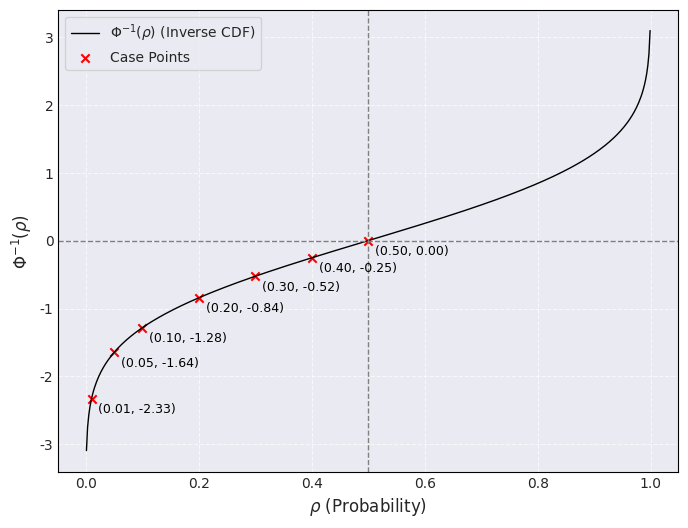

In [299]:
# Re-importing the required libraries and data in case of session reset
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Data setup
rho_values = np.linspace(0.001, 0.999, 500)
z_values = norm.ppf(rho_values)

case_rho = [0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5]
case_z = norm.ppf(case_rho)

# Plotting with borders and tick lines
plt.figure(figsize=(8, 6))

# Plot the main curve
plt.plot(rho_values, z_values, label=r'$\Phi^{-1}(\rho)$ (Inverse CDF)', linewidth=1, color='black')
plt.scatter(case_rho, case_z, color='red', label="Case Points",marker='x')

# Annotating the points
for rho, z in zip(case_rho, case_z):
    plt.annotate(f"({rho:.2f}, {z:.2f})",
                 (rho, z),
                 textcoords="offset points",
                 xytext=(5, -10),
                 ha='left',
                 fontsize=9,
                 color='black')

# Add borders
plt.gca().spines['top'].set_color('black')
plt.gca().spines['right'].set_color('black')
plt.gca().spines['bottom'].set_color('black')
plt.gca().spines['left'].set_color('black')

# Setting tick marks and directions
plt.tick_params(axis='x', which='both', direction='in', length=5)
plt.tick_params(axis='y', which='both', direction='in', length=5)

# Add grid, labels, and legend
plt.axhline(0, color='grey', linestyle='--', linewidth=1)
plt.axvline(0.5, color='grey', linestyle='--', linewidth=1)
# plt.title('Inverse CDF of Standard Normal Distribution with Annotated Points', fontsize=14)
plt.xlabel(r'$\rho$ (Probability)', fontsize=12)
plt.ylabel(r'$\Phi^{-1}(\rho)$', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=10)

plt.savefig(r"G:\纵向\小论文\共享停车和充电分配模型\ICDF.png",dpi=300)
# 显示
plt.show()


In [189]:
def load_unp_result_data(base_dir, skip_folders=None):
    if skip_folders is None:
        skip_folders = []

    merged_data = defaultdict(lambda: defaultdict(float))

    # 遍历所有的子文件夹
    for root, dirs, files in os.walk(base_dir):
        # 跳过指定的文件夹
        dirs[:] = [d for d in dirs if d not in skip_folders]

        # 检查是否在 result_info 目录下
        if 'result_info' in root:

            for file in files:
                method_version = float(file.split('_')[2].split('.npy')[0])  # 例如 'fbfs_1', 'dp_2'
                print(method_version)

                file_path = os.path.join(root, file)

                try:
                    # 加载 .npy 文件内容（是一个字典）
                    npy_data = np.load(file_path, allow_pickle=True).item()
                except Exception as e:
                    print(f"Error loading {file_path}: {e}")
                    continue  # 跳过出错的文件
                if method_version not in [0.5,0.33,1.33,1.67,1,2]:
                    # 将数据合并到相应的字典中
                    for key, value in npy_data.items():
                        merged_data[method_version][key] = value

    return merged_data

# 设置要跳过的文件夹
# skip_folders = [str(i)+'-1'for i in range(525,1025,25)]
# skip_folders.extend(['25-1','test_fbfs'])

# 正确的 base_dir 路径设置
base_dir = r'G:\2023-纵向\停车分配\unpanalysis\150-150'

# skip_folders = []

# for  i in range(60,541,60):
#     skip_folders.append(f'{i}-{600-i}')


upn_b = load_unp_result_data(base_dir)
# 输出记得sort()
# for rule in pd_31.keys():
#     for version in pd_31[rule].keys():
#         for key in pd_31[rule][version].keys():
#             pd_31[rule][version][key].sort()

0.33
0.5
0.0
1.33
1.67
1.0
10.0
15.0
2.0
20.0
25.0
30.0
5.0


In [190]:
upn_150_b = pd.DataFrame(data=dict(sorted(upn_b.items())))
upn_150_b

0.0           5.0           10.0          15.0  \
alpha1                  1.000000      1.000000      1.000000      1.000000   
alpha2                  1.000000      1.000000      1.000000      1.000000   
alpha3                  1.000000      1.000000      1.000000      1.000000   
request number        300.000000    300.000000    300.000000    300.000000   
objective value         0.000000      0.000000      0.000000      0.000000   
total revenue       23156.700000  23191.000000  23223.200000  23205.200000   
park revenue        17438.000000  17438.000000  17438.000000  17438.000000   
char revenue         5718.700000   5753.000000   5785.200000   5767.200000   
refuse number          38.000000     37.000000     36.000000     37.000000   
refuse park number      7.000000      7.000000      7.000000      7.000000   
refuse char number     31.000000     30.000000     29.000000     30.000000   
acc                     0.873333      0.876667      0.880000      0.876667   
park acc                0.953333      0.953333      0.953333      0.953333   
charge acc              0.793333      0.800000      0.806667      0.800000   
park util               0.458542      0.446667      0.444792      0.457292   
charge util             0.510833      0.521875      0.523125      0.510833   
total_util              0.484687      0.484271      0.483958      0.484063   
travel cost             7.916031      7.821293      7.840909      8.216730   
success ratio           0.938931      0.950570      0.939394      0.969582   
conflict cost          80.000000     65.000000     80.000000     40.000000   
net revenue         23076.700000  23126.000000  23143.200000  23165.200000   

                            20.0          25.0          30.0  
alpha1                  1.000000      1.000000      1.000000  
alpha2                  1.000000      1.000000      1.000000  
alpha3                  1.000000      1.000000      1.000000  
request number        300.000000    300.000000    300.000000  
objective value         0.000000      0.000000      0.000000  
total revenue       23204.400000  23112.900000  22737.600000  
park revenue        17438.000000  17438.000000  17121.000000  
char revenue         5766.400000   5674.900000   5616.600000  
refuse number          37.000000     40.000000     40.000000  
refuse park number      7.000000      7.000000      9.000000  
refuse char number     30.000000     33.000000     31.000000  
acc                     0.876667      0.866667      0.866667  
park acc                0.953333      0.953333      0.940000  
charge acc              0.800000      0.780000      0.793333  
park util               0.446875      0.454167      0.455833  
charge util             0.521458      0.516458      0.533750  
total_util              0.484167      0.485312      0.494792  
travel cost             8.315589      8.023077      8.061538  
success ratio           0.969582      0.988462      0.992308  
conflict cost          40.000000     15.000000     10.000000  
net revenue         23164.400000  23097.900000  22727.600000

In [191]:
base_dir = r'G:\2023-纵向\停车分配\unpanalysis\150-150-0'
upn_b = load_unp_result_data(base_dir)
upn_150_0_b = pd.DataFrame(data=dict(sorted(upn_b.items())))
upn_150_0_b

0.0
10.0
15.0
20.0
25.0
30.0
5.0


0.0           5.0           10.0          15.0  \
alpha1                  1.000000      1.000000      1.000000      1.000000   
alpha2                  1.000000      1.000000      1.000000      1.000000   
alpha3                  1.000000      1.000000      1.000000      1.000000   
request number        300.000000    300.000000    300.000000    300.000000   
objective value         0.000000      0.000000      0.000000      0.000000   
total revenue       24508.900000  24508.900000  24508.900000  24444.900000   
park revenue        18434.000000  18434.000000  18434.000000  18434.000000   
char revenue         6074.900000   6074.900000   6074.900000   6010.900000   
refuse number          24.000000     24.000000     24.000000     25.000000   
refuse park number      7.000000      7.000000      7.000000      7.000000   
refuse char number     17.000000     17.000000     17.000000     18.000000   
acc                     0.920000      0.920000      0.920000      0.916667   
park acc                0.953333      0.953333      0.953333      0.953333   
charge acc              0.886667      0.886667      0.886667      0.880000   
park util               0.446667      0.445000      0.435833      0.432292   
charge util             0.505625      0.507292      0.516458      0.521458   
total_util              0.476146      0.476146      0.476146      0.476875   
travel cost            10.217391     10.268116     10.166667      9.945455   
success ratio           0.887681      0.898551      0.887681      0.938182   
conflict cost         155.000000    140.000000    155.000000     85.000000   
net revenue         24353.900000  24368.900000  24353.900000  24359.900000   

                            20.0          25.0          30.0  
alpha1                  1.000000      1.000000      1.000000  
alpha2                  1.000000      1.000000      1.000000  
alpha3                  1.000000      1.000000      1.000000  
request number        300.000000    300.000000    300.000000  
objective value         0.000000      0.000000      0.000000  
total revenue       24445.000000  24116.900000  24381.700000  
park revenue        18418.000000  18434.000000  18434.000000  
char revenue         6027.000000   5682.900000   5947.700000  
refuse number          26.000000     27.000000     28.000000  
refuse park number      8.000000      7.000000      7.000000  
refuse char number     18.000000     20.000000     21.000000  
acc                     0.913333      0.910000      0.906667  
park acc                0.946667      0.953333      0.953333  
charge acc              0.880000      0.866667      0.860000  
park util               0.431042      0.426667      0.423542  
charge util             0.523542      0.533750      0.531875  
total_util              0.477292      0.480208      0.477708  
travel cost            10.218978     10.194139     10.058824  
success ratio           0.927007      0.959707      0.959559  
conflict cost         100.000000     55.000000     55.000000  
net revenue         24345.000000  24061.900000  24326.700000

In [192]:
base_dir = r'G:\2023-纵向\停车分配\unpanalysis\150-150-1'
upn_b = load_unp_result_data(base_dir)
upn_150_1_b = pd.DataFrame(data=dict(sorted(upn_b.items())))
upn_150_1_b

0.0
10.0
15.0
20.0
25.0
30.0
5.0


0.0           5.0           10.0          15.0  \
alpha1                  1.000000      1.000000      1.000000      1.000000   
alpha2                  1.000000      1.000000      1.000000      1.000000   
alpha3                  1.000000      1.000000      1.000000      1.000000   
request number        300.000000    300.000000    300.000000    300.000000   
objective value         0.000000      0.000000      0.000000      0.000000   
total revenue       23920.300000  23736.700000  23788.700000  23385.100000   
park revenue        17770.000000  17770.000000  17770.000000  17770.000000   
char revenue         6150.300000   5966.700000   6018.700000   5615.100000   
refuse number          34.000000     31.000000     30.000000     33.000000   
refuse park number      2.000000      2.000000      2.000000      2.000000   
refuse char number     32.000000     29.000000     28.000000     31.000000   
acc                     0.886667      0.896667      0.900000      0.890000   
park acc                0.986667      0.986667      0.986667      0.986667   
charge acc              0.786667      0.806667      0.813333      0.793333   
park util               0.465000      0.466667      0.446458      0.453125   
charge util             0.490417      0.491667      0.510625      0.512292   
total_util              0.477708      0.479167      0.478542      0.482708   
travel cost             9.947368     10.018587      9.866667     10.033708   
success ratio           0.875940      0.899628      0.940741      0.910112   
conflict cost         165.000000    135.000000     80.000000    120.000000   
net revenue         23755.300000  23601.700000  23708.700000  23265.100000   

                            20.0          25.0          30.0  
alpha1                  1.000000      1.000000      1.000000  
alpha2                  1.000000      1.000000      1.000000  
alpha3                  1.000000      1.000000      1.000000  
request number        300.000000    300.000000    300.000000  
objective value         0.000000      0.000000      0.000000  
total revenue       23269.400000  23326.500000  23355.700000  
park revenue        17770.000000  17770.000000  17770.000000  
char revenue         5499.400000   5556.500000   5585.700000  
refuse number          37.000000     36.000000     34.000000  
refuse park number      2.000000      2.000000      2.000000  
refuse char number     35.000000     34.000000     32.000000  
acc                     0.876667      0.880000      0.886667  
park acc                0.986667      0.986667      0.986667  
charge acc              0.766667      0.773333      0.786667  
park util               0.467917      0.448958      0.446667  
charge util             0.500000      0.517917      0.519375  
total_util              0.483958      0.483438      0.483021  
travel cost            10.110266      9.946970     10.045113  
success ratio           0.965779      0.981061      0.958647  
conflict cost          45.000000     25.000000     55.000000  
net revenue         23224.400000  23301.500000  23300.700000

In [193]:
# 正确的 base_dir 路径设置
base_dir = r'G:\2023-纵向\停车分配\unpanalysis\300-300'
upn_b = load_unp_result_data(base_dir)
upn_300_b = pd.DataFrame(data=dict(sorted(upn_b.items())))
upn_300_b

0.0
10.0
15.0
20.0
25.0
30.0
5.0


0.0           5.0           10.0          15.0  \
alpha1                  1.000000      1.000000      1.000000      1.000000   
alpha2                  1.000000      1.000000      1.000000      1.000000   
alpha3                  1.000000      1.000000      1.000000      1.000000   
request number        600.000000    600.000000    600.000000    600.000000   
objective value         0.000000      0.000000      0.000000      0.000000   
total revenue       30143.700000  30407.100000  30539.800000  30146.300000   
park revenue        23236.000000  23371.000000  23627.000000  23282.000000   
char revenue         6907.700000   7036.100000   6912.800000   6864.300000   
refuse number         275.000000    275.000000    280.000000    281.000000   
refuse park number    113.000000    113.000000    115.000000    115.000000   
refuse char number    162.000000    162.000000    165.000000    166.000000   
acc                     0.541667      0.541667      0.533333      0.531667   
park acc                0.623333      0.623333      0.616667      0.616667   
charge acc              0.460000      0.460000      0.450000      0.446667   
park util               0.335417      0.335417      0.337708      0.338333   
charge util             0.341458      0.341042      0.340625      0.346875   
total_util              0.338438      0.338229      0.339167      0.342604   
travel cost             8.107692      8.212308      8.375000      8.028213   
success ratio           0.858462      0.867692      0.871875      0.918495   
conflict cost         230.000000    215.000000    205.000000    130.000000   
net revenue         29913.700000  30192.100000  30334.800000  30016.300000   

                            20.0          25.0          30.0  
alpha1                  1.000000      1.000000      1.000000  
alpha2                  1.000000      1.000000      1.000000  
alpha3                  1.000000      1.000000      1.000000  
request number        600.000000    600.000000    600.000000  
objective value         0.000000      0.000000      0.000000  
total revenue       30123.700000  29534.600000  29619.300000  
park revenue        23130.000000  22611.000000  22520.000000  
char revenue         6993.700000   6923.600000   7099.300000  
refuse number         274.000000    277.000000    286.000000  
refuse park number    117.000000    120.000000    127.000000  
refuse char number    157.000000    157.000000    159.000000  
acc                     0.543333      0.538333      0.523333  
park acc                0.610000      0.600000      0.576667  
charge acc              0.476667      0.476667      0.470000  
park util               0.343542      0.346875      0.344167  
charge util             0.354792      0.358542      0.364792  
total_util              0.349167      0.352708      0.354479  
travel cost             8.024540      8.145511      8.375796  
success ratio           0.953988      0.969040      0.971338  
conflict cost          75.000000     50.000000     45.000000  
net revenue         30048.700000  29484.600000  29574.300000

In [194]:
base_dir = r'G:\2023-纵向\停车分配\unpanalysis\300-300-0'
upn_b = load_unp_result_data(base_dir)
upn_300_0_b = pd.DataFrame(data=dict(sorted(upn_b.items())))
upn_300_0_b

0.0
10.0
15.0
20.0
25.0
30.0
5.0


0.0           5.0           10.0          15.0  \
alpha1                  1.000000      1.000000      1.000000      1.000000   
alpha2                  1.000000      1.000000      1.000000      1.000000   
alpha3                  1.000000      1.000000      1.000000      1.000000   
request number        600.000000    600.000000    600.000000    600.000000   
objective value         0.000000      0.000000      0.000000      0.000000   
total revenue       29181.100000  29091.200000  28792.000000  29112.300000   
park revenue        22431.000000  22423.000000  22306.000000  22397.000000   
char revenue         6750.100000   6668.200000   6486.000000   6715.300000   
refuse number         302.000000    301.000000    306.000000    302.000000   
refuse park number    141.000000    140.000000    140.000000    142.000000   
refuse char number    161.000000    161.000000    166.000000    160.000000   
acc                     0.496667      0.498333      0.490000      0.496667   
park acc                0.530000      0.533333      0.533333      0.526667   
charge acc              0.463333      0.463333      0.446667      0.466667   
park util               0.337917      0.330208      0.336250      0.335000   
charge util             0.352083      0.355000      0.353958      0.364583   
total_util              0.345000      0.342604      0.345104      0.349792   
travel cost            10.744966     10.886288     10.884354     11.053691   
success ratio           0.832215      0.849498      0.891156      0.912752   
conflict cost         250.000000    225.000000    160.000000    130.000000   
net revenue         28931.100000  28866.200000  28632.000000  28982.300000   

                            20.0          25.0          30.0  
alpha1                  1.000000      1.000000      1.000000  
alpha2                  1.000000      1.000000      1.000000  
alpha3                  1.000000      1.000000      1.000000  
request number        600.000000    600.000000    600.000000  
objective value         0.000000      0.000000      0.000000  
total revenue       28495.900000  28413.900000  28385.500000  
park revenue        21883.000000  21984.000000  22031.000000  
char revenue         6612.900000   6429.900000   6354.500000  
refuse number         307.000000    309.000000    314.000000  
refuse park number    143.000000    144.000000    145.000000  
refuse char number    164.000000    165.000000    169.000000  
acc                     0.488333      0.485000      0.476667  
park acc                0.523333      0.520000      0.516667  
charge acc              0.453333      0.450000      0.436667  
park util               0.328958      0.335625      0.336875  
charge util             0.373125      0.376250      0.382708  
total_util              0.351042      0.355938      0.359792  
travel cost            10.856655     10.828179     11.083916  
success ratio           0.952218      0.955326      0.972028  
conflict cost          70.000000     65.000000     40.000000  
net revenue         28425.900000  28348.900000  28345.500000

In [195]:
base_dir = r'G:\2023-纵向\停车分配\unpanalysis\300-300-1'
upn_b = load_unp_result_data(base_dir)
upn_300_1_b = pd.DataFrame(data=dict(sorted(upn_b.items())))
upn_300_1_b

0.0
10.0
15.0
20.0
25.0
30.0
5.0


0.0           5.0           10.0          15.0  \
alpha1                  1.000000      1.000000      1.000000      1.000000   
alpha2                  1.000000      1.000000      1.000000      1.000000   
alpha3                  1.000000      1.000000      1.000000      1.000000   
request number        600.000000    600.000000    600.000000    600.000000   
objective value         0.000000      0.000000      0.000000      0.000000   
total revenue       31193.400000  31651.700000  31485.800000  30980.500000   
park revenue        22374.000000  22811.000000  22850.000000  22289.000000   
char revenue         8819.400000   8840.700000   8635.800000   8691.500000   
refuse number         296.000000    297.000000    300.000000    294.000000   
refuse park number    126.000000    124.000000    124.000000    127.000000   
refuse char number    170.000000    173.000000    176.000000    167.000000   
acc                     0.506667      0.505000      0.500000      0.510000   
park acc                0.580000      0.586667      0.586667      0.576667   
charge acc              0.433333      0.423333      0.413333      0.443333   
park util               0.332500      0.331875      0.329375      0.331667   
charge util             0.329792      0.330417      0.332917      0.336250   
total_util              0.331146      0.331146      0.331146      0.333958   
travel cost            10.651316     10.372937     10.493333     10.777778   
success ratio           0.809211      0.848185      0.896667      0.918301   
conflict cost         290.000000    230.000000    155.000000    125.000000   
net revenue         30903.400000  31421.700000  31330.800000  30855.500000   

                            20.0          25.0          30.0  
alpha1                  1.000000      1.000000      1.000000  
alpha2                  1.000000      1.000000      1.000000  
alpha3                  1.000000      1.000000      1.000000  
request number        600.000000    600.000000    600.000000  
objective value         0.000000      0.000000      0.000000  
total revenue       30524.100000  30792.400000  29697.900000  
park revenue        22123.000000  22549.000000  21470.000000  
char revenue         8401.100000   8243.400000   8227.900000  
refuse number         302.000000    304.000000    305.000000  
refuse park number    128.000000    128.000000    130.000000  
refuse char number    174.000000    176.000000    175.000000  
acc                     0.496667      0.493333      0.491667  
park acc                0.573333      0.573333      0.566667  
charge acc              0.420000      0.413333      0.416667  
park util               0.335625      0.334792      0.337917  
charge util             0.340625      0.355208      0.358958  
total_util              0.338125      0.345000      0.348438  
travel cost            10.852349     10.581081     10.688136  
success ratio           0.953020      0.972973      0.966102  
conflict cost          70.000000     40.000000     50.000000  
net revenue         30454.100000  30752.400000  29647.900000

In [196]:
# 合并三次仿真结果
unp_150 = (upn_150_b + upn_150_0_b + upn_150_1_b) / 3
unp_300 = (upn_300_b + upn_300_0_b + upn_300_1_b) / 3

In [238]:
def plot_four_subplots(df1, df2):
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    axes = axes.flatten()

    # 定义一个绘制函数
    def plot_revenue_conflict(ax, df, title):
        # 第一个y轴: total revenue 和 net revenue
        ax.plot(df.loc['total revenue'], label='Total Revenue', color='#45a146', linestyle='-')
        ax.plot(df.loc['net revenue'], label='Net Revenue', color='#45a146', linestyle='-.')
        ax.set_ylabel('Revenue',color='#45a146',fontsize=14)
        ax.set_xlabel('Buffer size',fontsize=14)
        ax.set_xticks([i for i in range(0,35,5)])
        ax.set_xticklabels([i for i in range(0,35,5)],fontsize=14)
        ax.tick_params(axis='y',color='#45a146',labelsize=14)
        ax.tick_params(axis='x',labelsize=14)

        # 第二个y轴: conflict cost (柱状图)
        ax2 = ax.twinx()
        ax2.bar([i for i in range(0,31,5)], df.loc['conflict cost'], label='Conflict Cost', color='#ff7f0e', alpha=0.5, width=2)
        # ax2.set_ylabel('Conflict Cost', color='tab:gray')
        ax2.tick_params(axis='y',color='#ff7f0e',labelsize=14)
        ax2.set_ylabel('Conflict cost',color='#ff7f0e',fontsize=14)

        ax3 = ax.twinx()
        ax3.spines['right'].set_position(('outward',42))
        # ax3.plot(df.loc['acc'], label='Accept Ratio', color='#4169E1', linestyle='-')
        ax3.plot(df.loc['success ratio'], label='Success Ratio', color='#4169E1', linestyle='-.')
        ax3.set_ylabel('Ratio',color='#4169E1',fontsize=14)
        ax3.tick_params(axis='y',color='#4169E1',labelsize=14)

        ax.set_title(title,fontsize=14)
        ax.legend(loc="upper right",bbox_to_anchor=(1, 0.75),framealpha = 0.5,fontsize=14)
        ax2.legend(framealpha = 0.5,fontsize=14)
        ax3.legend(framealpha = 0.5,fontsize=14)

        # ax.grid(False)
        ax2.grid(False)
        ax3.grid(False)

    # 第一个子图 (df1)
    plot_revenue_conflict(axes[0], df1, "Demand:Supply=3:1")
    # 第er个子图 (df2)
    plot_revenue_conflict(axes[1], df2, "Demand:Supply=6:1")

    plt.tight_layout()
    # fig.legend(loc="upper center", bbox_to_anchor=(0.5, 1.1), ncol=3)

    plt.savefig(r"G:\纵向\小论文\共享停车和充电分配模型\analysis\unp_analysis_1_new.png",dpi=500)
    plt.show()

# 调用函数绘图
# plot_four_subplots(upn_150_b, upn_300_b)

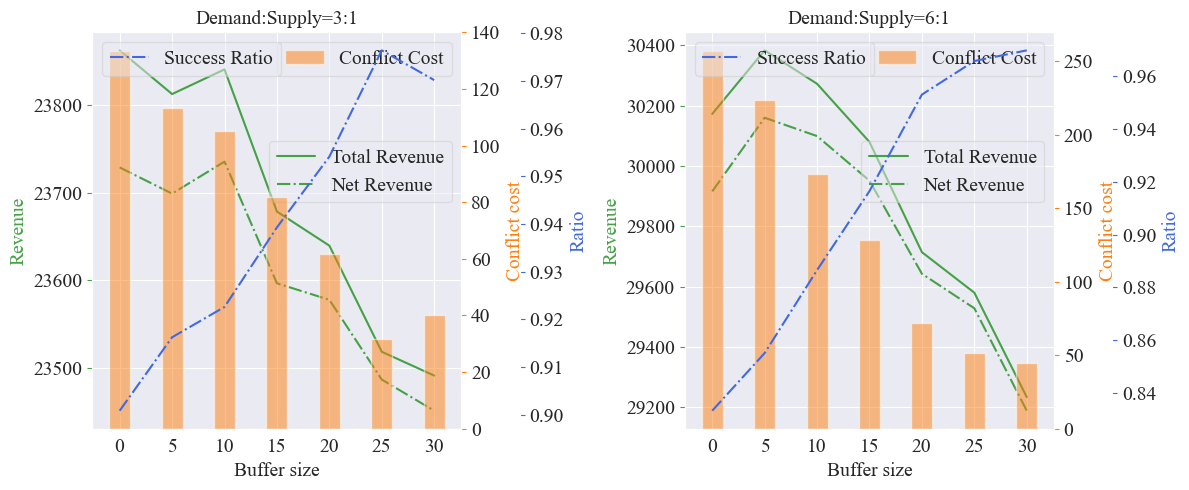

In [239]:
plot_four_subplots(unp_150, unp_300)

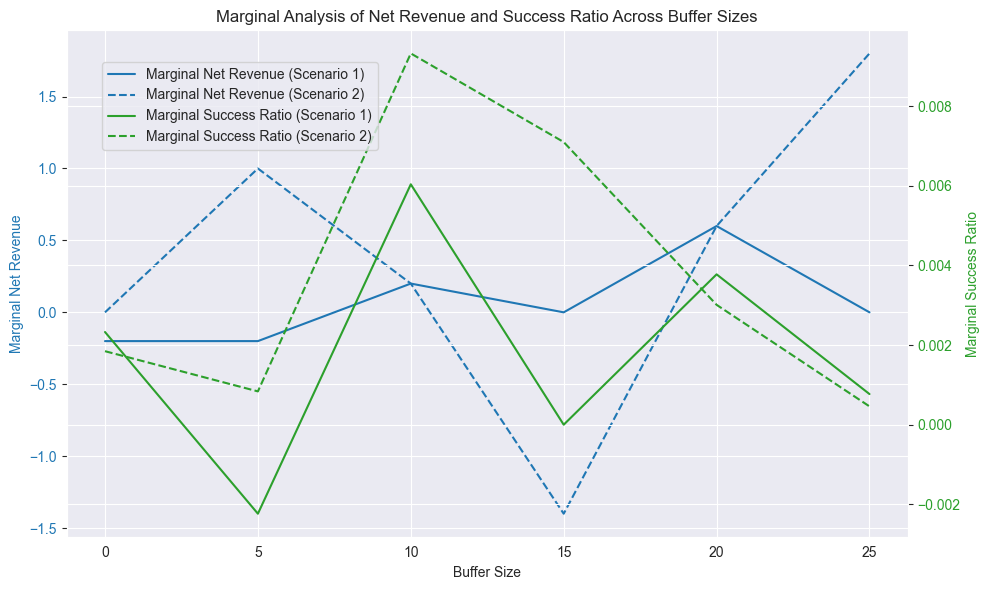

In [90]:
# 假设 df1 和 df2 是两个 DataFrame，包含以下列：
# 'net revenue', 'success ratio'，且 index 是 buffer size

buffer_x = [i for i in range(0,31,5)]

def plot_marginal_analysis(df1, df2, buffer_label="Buffer Size"):
    # 计算边际收益和边际成功率
    marginal_net_revenue_df1 = (df1.loc['refuse number'].shift(-1) - df1.loc['refuse number']).values / ([5]*7)
    marginal_net_revenue_df2 = (df2.loc['refuse number'].shift(-1) - df2.loc['refuse number']).values / ([5]*7)

    marginal_success_ratio_df1 = (df1.loc['success ratio'].shift(-1) - df1.loc['success ratio']).values / ([5]*7)
    marginal_success_ratio_df2 = (df2.loc['success ratio'].shift(-1) - df2.loc['success ratio']).values/ ([5]*7)

    # 绘制图表
    fig, ax1 = plt.subplots(figsize=(10, 6))

    # 绘制边际 net revenue 的折线
    ax1.plot(buffer_x[:-1], marginal_net_revenue_df1[:-1], label='Marginal Net Revenue (Scenario 1)', color='tab:blue', linestyle='-')
    ax1.plot(buffer_x[:-1], marginal_net_revenue_df2[:-1], label='Marginal Net Revenue (Scenario 2)', color='tab:blue', linestyle='--')
    ax1.set_xlabel(buffer_label)
    ax1.set_ylabel('Marginal Net Revenue', color='tab:blue')
    ax1.tick_params(axis='y', labelcolor='tab:blue')

    # 添加第二个 y 轴，用于绘制边际 success ratio
    ax2 = ax1.twinx()
    ax2.plot(buffer_x[:-1], marginal_success_ratio_df1[:-1], label='Marginal Success Ratio (Scenario 1)', color='tab:green', linestyle='-')
    ax2.plot(buffer_x[:-1], marginal_success_ratio_df2[:-1], label='Marginal Success Ratio (Scenario 2)', color='tab:green', linestyle='--')
    ax2.set_ylabel('Marginal Success Ratio', color='tab:green')
    ax2.tick_params(axis='y', labelcolor='tab:green')

    # 图例
    fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))
    plt.title('Marginal Analysis of Net Revenue and Success Ratio Across Buffer Sizes')
    plt.tight_layout()
    plt.show()

# 调用函数
plot_marginal_analysis(upn_150_b, upn_300_b)


In [198]:
# 假设 df1 和 df2 已经加载并包含相应的列数据
# df1 和 df2 是两个数据框，分别表示供需比为3:1和6:1的情况

buffer_x = [i for i in range(0,31,5)]

def calculate_marginals_and_elasticity(df):
    # 计算边际收益 (total revenue 对 buffer size 的变化)
    marginal_revenue = (df.loc['total revenue'].shift(-1) - df.loc['total revenue']).values / ([5]*7)

    # 计算边际成本 (conflict cost 对 buffer size 的变化)
    marginal_cost = (df.loc['conflict cost'].shift(-1) - df.loc['conflict cost']).values / ([5]*7)

    # 计算边际成功率 (success ratio 对 buffer size 的变化)
    marginal_success_ratio = (df.loc['success ratio'].shift(-1) - df.loc['success ratio']).values / ([5]*7)

    # 计算收益弹性 (total revenue 对 buffer size 的弹性)
    elasticity_of_revenue = (marginal_revenue / df.loc['total revenue']) * ([5]*7 / df.loc['total revenue'])

    # 计算冲突成本弹性 (conflict cost 对 buffer size 的弹性)
    elasticity_of_cost = (marginal_cost / df.loc['conflict cost']) * ([5]*7 / df.loc['conflict cost'])

    # 计算成功率弹性 (success ratio 对 buffer size 的弹性)
    elasticity_of_success_ratio = (marginal_success_ratio / df.loc['success ratio']) * ([5]*7 / df.loc['success ratio'])

    return marginal_revenue, marginal_cost, marginal_success_ratio, elasticity_of_revenue, elasticity_of_cost, elasticity_of_success_ratio

In [215]:
# 绘制四个子图
def plot_analysis(df1, df2, marginal_revenue1, marginal_cost1, marginal_success_ratio1, elasticity1_revenue,
                  elasticity1_cost, elasticity1_success_ratio, marginal_revenue2, marginal_cost2, marginal_success_ratio2,
                  elasticity2_revenue, elasticity2_cost, elasticity2_success_ratio):

    fig, axs = plt.subplots(1, 3, figsize=(15, 5))

    # 第一个子图：边际 total revenue
    axs[0].plot(buffer_x[:-1], marginal_revenue1[:-1], label='Marginal Revenue (3:1)', color='tab:blue', linestyle='-')
    axs[0].plot(buffer_x[:-1], marginal_revenue2[:-1], label='Marginal Revenue (6:1)', color='tab:blue', linestyle='--')
    axs[0].set_xlabel('Buffer Size',fontsize=16)
    axs[0].set_ylabel('Marginal Revenue',fontsize=16)
    axs[0].set_xticks([i for i in range(0,26,5)])
    axs[0].tick_params(axis='x',labelsize=16)
    axs[0].tick_params(axis='y',labelsize=16)
    axs[0].legend(fontsize=16,framealpha=0.5)
    # axs[0].set_title('Marginal Revenue vs Buffer Size')

    # 第二个子图：边际 conflict cost
    axs[1].plot(buffer_x[:-1], marginal_cost1[:-1], label='Marginal Cost (3:1)', color='tab:red', linestyle='-')
    axs[1].plot(buffer_x[:-1], marginal_cost2[:-1], label='Marginal Cost (6:1)', color='tab:red', linestyle='--')
    axs[1].set_xlabel('Buffer Size',fontsize=16)
    axs[1].tick_params(axis='x',labelsize=16)
    axs[1].tick_params(axis='y',labelsize=16)
    axs[1].set_xticks([i for i in range(0,26,5)])
    axs[1].set_ylabel('Marginal Cost',fontsize=16)
    axs[1].legend(fontsize=16,framealpha=0.5)
    # axs[1].set_title('Marginal Cost vs Buffer Size')

    # 第三个子图：边际 success ratio
    axs[2].plot(buffer_x[:-1], marginal_success_ratio1[:-1], label='Marginal Success Ratio (3:1)', color='tab:green', linestyle='-')
    axs[2].plot(buffer_x[:-1], marginal_success_ratio2[:-1], label='Marginal Success Ratio (6:1)', color='tab:green', linestyle='--')
    axs[2].set_xlabel('Buffer Size',fontsize=16)
    axs[2].set_ylabel('Marginal Success Ratio',fontsize=16)
    axs[2].tick_params(axis='x',labelsize=16)
    axs[2].tick_params(axis='y',labelsize=16)
    axs[2].legend(fontsize=16,framealpha=0.5)
    axs[2].set_xticks([i for i in range(0,26,5)])
    # axs[2].set_title('Marginal Success Ratio vs Buffer Size')

    plt.tight_layout()
    plt.savefig(r"G:\纵向\小论文\共享停车和充电分配模型\analysis\unp_analysis_2_new.png",dpi=500)
    plt.show()

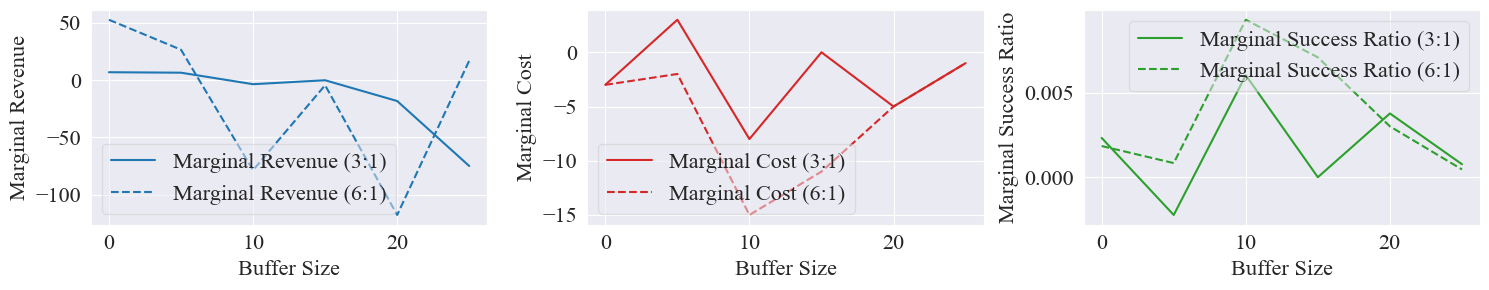

In [204]:
# 计算边际值和弹性
marginal_revenue1, marginal_cost1, marginal_success_ratio1, elasticity1_revenue, elasticity1_cost, elasticity1_success_ratio = calculate_marginals_and_elasticity(upn_150_b)
marginal_revenue2, marginal_cost2, marginal_success_ratio2, elasticity2_revenue, elasticity2_cost, elasticity2_success_ratio = calculate_marginals_and_elasticity(upn_300_b)

# 调用绘图函数
plot_analysis(upn_150_b, upn_300_b, marginal_revenue1, marginal_cost1, marginal_success_ratio1, elasticity1_revenue,
              elasticity1_cost, elasticity1_success_ratio, marginal_revenue2, marginal_cost2, marginal_success_ratio2,
              elasticity2_revenue, elasticity2_cost, elasticity2_success_ratio)

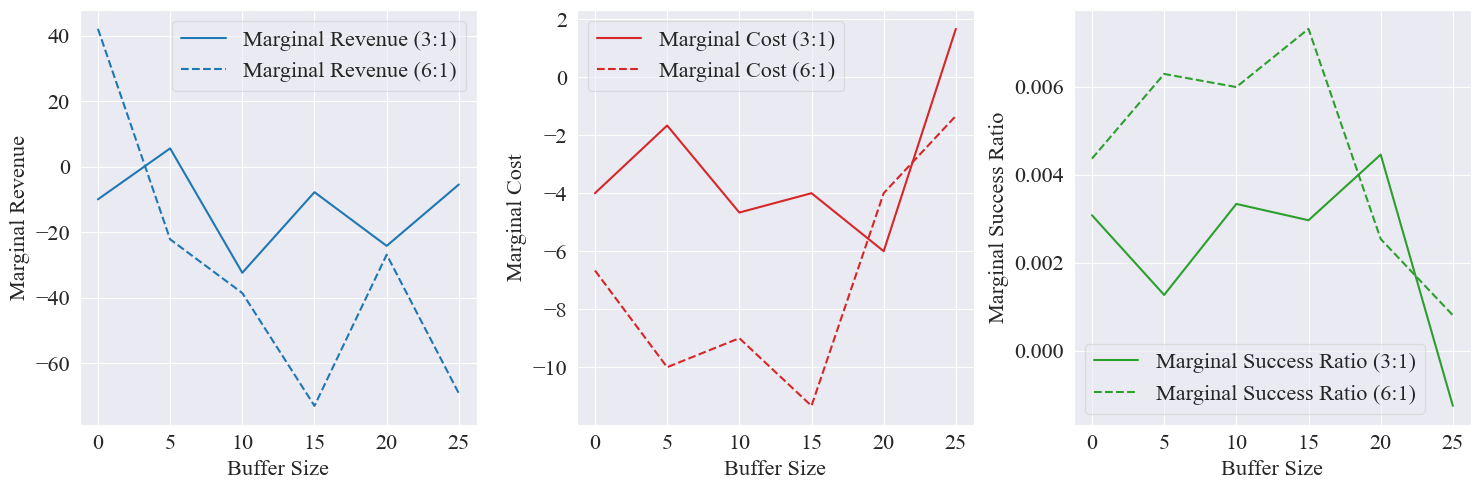

In [216]:
# 计算边际值和弹性
marginal_revenue1, marginal_cost1, marginal_success_ratio1, elasticity1_revenue, elasticity1_cost, elasticity1_success_ratio = calculate_marginals_and_elasticity(unp_150)
marginal_revenue2, marginal_cost2, marginal_success_ratio2, elasticity2_revenue, elasticity2_cost, elasticity2_success_ratio = calculate_marginals_and_elasticity(unp_300)

# 调用绘图函数
plot_analysis(unp_150, unp_300, marginal_revenue1, marginal_cost1, marginal_success_ratio1, elasticity1_revenue,
              elasticity1_cost, elasticity1_success_ratio, marginal_revenue2, marginal_cost2, marginal_success_ratio2,
              elasticity2_revenue, elasticity2_cost, elasticity2_success_ratio)

# supply and demand analysis

In [10]:
def load_npy_data(base_dir, skip_folders=None):
    if skip_folders is None:
        skip_folders = []

    methods = ['00','10','20']
    merged_data = {method: defaultdict(lambda: defaultdict(list)) for method in methods}


    # 遍历所有的子文件夹
    for root, dirs, files in os.walk(base_dir):
        # 跳过指定的文件夹
        dirs[:] = [d for d in dirs if d not in skip_folders]

        # 检查是否在 result_info 目录下
        if 'result_info' in root:
            folder_name = os.path.basename(os.path.dirname(root))  # 例如 '50-1', '75-1'

            for file in files:
                method = file.split('_')[1]  # 例如 '00.1', '00.2', '00.3','10.1'
                share_case = method.split('.')[0]  # 例如 '00', '10','20'
                park_ratio = method.split('.')[1]  # 例如 '00', '10','20'
                file_path = os.path.join(root, file)
                try:
                    # 加载 .npy 文件内容（是一个字典）
                    npy_data = np.load(file_path, allow_pickle=True).item()
                except Exception as e:
                    print(f"Error loading {file_path}: {e}")
                    continue  # 跳过出错的文件

                # 将数据合并到相应的字典中
                for key, value in npy_data.items():
                     merged_data[share_case][park_ratio][key].append((int(folder_name.split('-')[0]), value))

    return merged_data

In [11]:
# 正确的 base_dir 路径设置
base_dir = r'G:\2023-纵向\停车分配\demand_and_supply_analysis\31'

result_info_31 = load_npy_data(base_dir)
# 输出记得sort()
for rule in result_info_31.keys():
    for version in result_info_31[rule].keys():
        for key in result_info_31[rule][version].keys():
            result_info_31[rule][version][key].sort()

In [12]:
# 正确的 base_dir 路径设置
base_dir = r'G:\2023-纵向\停车分配\demand_and_supply_analysis\61'

result_info_61 = load_npy_data(base_dir)
# 输出记得sort()
for rule in result_info_61.keys():
    for version in result_info_61[rule].keys():
        for key in result_info_61[rule][version].keys():
            result_info_61[rule][version][key].sort()

In [23]:
result_info_31['00']['1']['total revenue']

[(30, 14557.0),
 (60, 12957.100000000002),
 (90, 12067.099999999999),
 (120, 10474.699999999997),
 (150, 9335.000000000002),
 (180, 7638.700000000001),
 (210, 6323.2),
 (240, 4807.800000000002),
 (270, 3826.0)]

In [27]:
temp_dt = np.zeros((9,9))
col_head = [str(i) for i in range(1,10)]
for col in range(1,10):
    for row in range(9):
        temp_dt[row][col-1] = result_info_31['00'][str(col)]['total revenue'][row][1]
case_0_31 = pd.DataFrame(columns=col_head,data=temp_dt)
case_0_31.set_index(pd.Index([i/10 for i in range(1,10)]),inplace=True)

In [35]:
case_0_31.set_index(pd.Index([i/10 for i in range(1,10)]),inplace=True)

1        2        3        4        5        6        7        8  \
0.1  14557.0  15295.5  15090.5  14395.3  14016.8  13618.4  12797.7  10962.0   
0.2  12957.1  15095.6  16190.1  16822.4  16538.9  16131.3  15122.0  13350.4   
0.3  12067.1  14418.6  16272.1  18415.6  19158.1  18856.1  18213.0  16843.5   
0.4  10474.7  13122.2  15465.7  17582.2  19166.2  20091.2  19945.0  19105.3   
0.5   9335.0  11667.5  14192.0  16780.5  18870.5  20961.3  22417.2  22189.0   
0.6   7638.7  10595.7  13366.7  15884.7  17971.7  19735.6  21337.9  22857.7   
0.7   6323.2   8753.2  11122.2  13645.2  16327.2  18554.8  21137.3  22798.4   
0.8   4807.8   7484.8   9854.8  12860.8  15069.8  17750.8  19555.3  21704.8   
0.9   3826.0   6353.0   8989.0  11782.0  14250.0  16351.0  18592.0  20864.0   

           9  
0.1   8430.3  
0.2  11034.2  
0.3  14822.5  
0.4  17259.0  
0.5  21122.2  
0.6  23445.1  
0.7  24013.0  
0.8  23480.8  
0.9  23071.5

In [36]:
temp_dt = np.zeros((9,9))
col_head = [str(i) for i in range(1,10)]
for col in range(1,10):
    for row in range(9):
        temp_dt[row][col-1] = result_info_31['10'][str(col)]['total revenue'][row][1]
case_1_31 = pd.DataFrame(columns=col_head,data=temp_dt)
case_1_31.set_index(pd.Index([i/10 for i in range(1,10)]),inplace=True)
case_1_31

1        2        3        4        5        6        7        8  \
0.1  15337.6  14978.6  14377.9  14329.9  13883.1  13470.8  12108.5  10455.9   
0.2  17007.5  16813.0  16529.5  16433.0  16126.6  15460.8  14209.5  12794.0   
0.3  19158.8  19357.6  18896.3  19007.1  18824.6  18048.5  17182.4  16297.5   
0.4  20876.7  20406.3  20369.6  20251.2  20075.1  19612.1  19112.3  18041.1   
0.5  22949.0  23073.9  23053.4  22867.5  22406.0  22264.3  22083.7  21091.4   
0.6  24553.9  24645.6  24609.2  24463.0  24393.9  24197.0  23932.8  23323.4   
0.7  25349.7  25398.2  25273.5  25201.6  25144.3  25032.5  24925.6  24566.7   
0.8  24469.3  24482.6  24473.1  24440.2  24391.9  24551.9  24278.3  24312.6   
0.9  23999.4  24086.4  24086.4  24075.9  23999.7  24078.3  24008.2  23866.9   

           9  
0.1   8292.1  
0.2  10696.9  
0.3  14155.2  
0.4  16738.1  
0.5  20375.6  
0.6  22344.5  
0.7  23921.9  
0.8  24267.0  
0.9  23967.9

In [37]:
temp_dt = np.zeros((9,9))
for col in range(1,10):
    for row in range(9):
        temp_dt[row][col-1] = result_info_31['20'][str(col)]['total revenue'][row][1]
case_2_31 = pd.DataFrame(columns=col_head,data=temp_dt)
case_2_31.set_index(pd.Index([i/10 for i in range(1,10)]),inplace=True)
case_2_31

1        2        3        4        5        6        7        8  \
0.1  14855.5  15242.0  14677.0  14395.3  13992.8  13536.9  12573.2  10912.0   
0.2  13840.6  15462.7  16645.2  16683.0  16359.0  15866.0  14455.2  13308.2   
0.3  13230.1  15314.1  17344.1  18931.1  19131.7  18737.3  17696.4  16268.9   
0.4  12285.7  14769.2  17046.2  18773.2  19792.2  20144.3  19707.3  18682.8   
0.5  11323.5  13882.0  16146.5  18869.8  20671.4  21945.5  22656.4  21828.1   
0.6   9440.1  12278.1  15119.1  17485.1  19853.6  21805.9  23105.3  23940.0   
0.7   8636.3  11242.9  13705.9  16557.9  19529.9  21350.4  22835.2  24042.5   
0.8   7736.8  10177.8  12910.8  15448.8  18027.8  20886.3  22952.2  24241.2   
0.9   6552.0   9033.0  11557.0  14177.0  17404.0  20269.6  22264.1  23573.5   

           9  
0.1   8329.6  
0.2  10890.9  
0.3  14427.2  
0.4  17019.0  
0.5  20696.1  
0.6  23275.8  
0.7  24618.4  
0.8  24277.6  
0.9  23914.5

In [38]:
temp_dt = np.zeros((9, 9))
for col in range(1, 10):
    for row in range(9):
        temp_dt[row][col - 1] = result_info_61['00'][str(col)]['total revenue'][row][1]
case_0_61 = pd.DataFrame(columns=col_head, data=temp_dt)
case_0_61.set_index(pd.Index([i / 10 for i in range(1, 10)]), inplace=True)
case_0_61

1        2        3        4        5        6        7        8  \
0.1  21802.9  23670.4  25045.4  23751.1  22661.6  21009.0  18995.4  16570.3   
0.2  20986.2  22808.1  24598.4  25890.2  26638.3  26228.1  24743.2  22396.3   
0.3  18745.7  21235.8  23867.3  25805.6  26947.7  27180.9  27328.8  26891.1   
0.4  16672.3  18908.8  21201.6  24147.8  26507.8  27506.5  27886.1  28240.7   
0.5  15150.0  17595.5  20296.0  22607.5  24439.7  26641.9  28289.2  29035.0   
0.6  12828.0  15326.5  17585.5  19609.5  21946.0  24189.5  26323.6  27612.0   
0.7  11004.0  13456.0  15629.0  17977.5  20610.5  23240.0  25641.5  27525.2   
0.8   9071.0  11538.0  13953.0  16321.0  19042.5  21431.5  24244.5  26398.5   
0.9   6116.8   8772.8  11267.8  13706.8  16927.8  19828.8  22351.8  24857.3   

           9  
0.1  13189.4  
0.2  18934.6  
0.3  24997.2  
0.4  27199.7  
0.5  28676.9  
0.6  28409.8  
0.7  28999.5  
0.8  28078.7  
0.9  26924.8

In [39]:
temp_dt = np.zeros((9, 9))
for col in range(1, 10):
    for row in range(9):
        temp_dt[row][col - 1] = result_info_61['10'][str(col)]['total revenue'][row][1]
case_1_61 = pd.DataFrame(columns=col_head, data=temp_dt)
case_1_61.set_index(pd.Index([i / 10 for i in range(1, 10)]), inplace=True)
case_1_61

1        2        3        4        5        6        7        8  \
0.1  25375.2  24594.2  23768.7  22842.3  21997.7  19383.9  18317.4  16045.9   
0.2  28601.1  27862.4  27743.2  26681.7  26786.7  24800.3  23374.4  21664.3   
0.3  31265.5  31012.8  30735.0  30723.7  29655.6  28986.7  28003.7  26374.0   
0.4  30353.0  30674.6  30090.7  29531.6  29386.4  28732.0  28078.3  27271.5   
0.5  29980.4  29928.4  29969.5  29723.9  29320.1  28964.6  29123.7  28148.4   
0.6  28747.6  28973.9  28673.2  28843.6  28489.0  28648.1  28299.3  28240.3   
0.7  28750.1  28862.3  28868.3  28987.8  28654.3  28928.2  28834.5  28656.1   
0.8  27829.8  27854.9  27908.6  27899.0  27938.8  27922.4  27942.0  28164.3   
0.9  28408.8  28129.3  28261.5  28301.8  28353.9  28439.9  28396.8  28098.6   

           9  
0.1  12890.9  
0.2  18531.4  
0.3  24452.4  
0.4  26141.9  
0.5  27906.2  
0.6  27551.2  
0.7  28713.3  
0.8  27953.6  
0.9  28271.0

In [40]:
temp_dt = np.zeros((9, 9))
for col in range(1, 10):
    for row in range(9):
        temp_dt[row][col - 1] = result_info_61['20'][str(col)]['total revenue'][row][1]
case_2_61 = pd.DataFrame(columns=col_head, data=temp_dt)
case_2_61.set_index(pd.Index([i / 10 for i in range(1, 10)]), inplace=True)
case_2_61

1        2        3        4        5        6        7        8  \
0.1  22513.3  23977.9  24972.3  23595.1  22617.6  20913.0  18771.2  16467.3   
0.2  22257.9  24255.0  26026.5  26929.2  27248.8  25588.5  24068.9  22197.4   
0.3  20753.7  23683.7  25971.4  27137.7  27255.0  27800.1  27375.1  26854.7   
0.4  19655.2  21559.8  24787.9  26936.6  27940.1  28929.1  28536.4  28191.2   
0.5  18675.5  21289.7  23830.7  25739.0  28175.7  29296.0  29778.0  29319.1   
0.6  16424.5  18850.1  20926.8  23010.7  25056.4  26914.4  28100.4  28235.1   
0.7  16083.0  18178.5  20973.5  23136.3  24770.2  27454.5  27940.8  29146.9   
0.8  14949.5  17335.0  19519.5  21929.3  24116.8  26461.0  27635.8  28049.1   
0.9  12976.8  15534.8  17904.8  20753.8  23097.9  25156.9  26239.3  27112.2   

           9  
0.1  13024.5  
0.2  18719.9  
0.3  25209.2  
0.4  26143.0  
0.5  28586.4  
0.6  28392.0  
0.7  29094.5  
0.8  27981.9  
0.9  27660.0

In [54]:
# case * demand (5 * 9)
temp_arr = np.zeros((10,9))
row_index = result_info['fbfs'].keys()
dt_index = []
i = 0
for case in row_index:
    temp_arr[i] = [result_info['fbfs'][case]['park revenue'][k][1] for k in range(9)]
    i += 1
    temp_arr[i] = [result_info['fbfs'][case]['char revenue'][k][1] for k in range(9)]
    i += 1
    dt_index.append(case)
    dt_index.append(case)
_index = [each+'_p' if i%2==0 else each+'_c' for i,each in enumerate(dt_index)]
temp_dt_0 = pd.DataFrame(columns=[i*2 for i in range(100,301,25)],data=temp_arr,index=_index)
temp_dt_0

200      250      300      350      400      450      500  \
fbfs_0_p  10791.0  12026.0  12594.0  12829.0  13236.0  13391.0  13666.0   
fbfs_0_c   5354.5   5946.3   6171.4   6328.0   8584.2   8454.7   9409.3   
fbfs_1_p  10939.0  15197.0  17466.0  19999.0  21732.0  22777.0  23670.0   
fbfs_1_c   5129.0   5032.2   5199.1   4637.0   4821.5   4645.8   4350.0   
fbfs_2_p  10939.0  13115.0  14483.0  15154.0  15303.0  16111.0  16871.0   
fbfs_2_c   5307.5   5960.8   6096.4   6274.0   7874.0   7894.8   8991.4   
fbfs_3_p  10939.0  15197.0  15580.0  16738.0  17567.0  18832.0  19742.0   
fbfs_3_c   5205.0   5698.3   5951.9   6011.0   8039.4   7220.7   7554.4   
fbfs_4_p  10939.0  15197.0  17466.0  19950.0  20608.0  22000.0  21614.0   
fbfs_4_c   5354.5   5711.4   5654.0   5577.4   7058.9   5966.0   6996.2   

              550      600  
fbfs_0_p  13617.0  13988.0  
fbfs_0_c   9466.4  10770.9  
fbfs_1_p  23796.0  24337.0  
fbfs_1_c   4814.4   4615.3  
fbfs_2_p  17496.0  18135.0  
fbfs_2_c   8692.4   9595.3  
fbfs_3_p  20111.0  20835.0  
fbfs_3_c   7459.2   8237.3  
fbfs_4_p  22588.0  23058.0  
fbfs_4_c   6436.9   6867.3

In [48]:
temp_arr = np.zeros((10,9))
row_index = result_info['dp'].keys()
dt_index = []
i = 0
for case in row_index:
    temp_arr[i] = [result_info['dp'][case]['park revenue'][k][1] for k in range(9)]
    i += 1
    temp_arr[i] = [result_info['dp'][case]['char revenue'][k][1] for k in range(9)]
    i += 1
    dt_index.append(case)
    dt_index.append(case)
_index = [each+'_p' if i%2==0 else each+'_c' for i,each in enumerate(dt_index)]
temp_dt_1 = pd.DataFrame(columns=[i*2 for i in range(100,301,25)],data=temp_arr,index=_index)
temp_dt_1

200      250      300      350      400      450      500  \
dp_0_p  10765.0  12191.0  12695.0  13063.0  13190.0  13854.0  13754.0   
dp_0_c   5342.0   5955.0   6159.5   6410.9   8545.3   8482.8   9452.2   
dp_1_p  10926.0  15176.0  17438.0  19864.0  21475.0  23229.0  23313.0   
dp_1_c   5192.5   5450.8   5105.6   4490.8   5420.2   4302.2   5406.7   
dp_2_p  10926.0  13248.0  14462.0  15001.0  15335.0  16074.0  17036.0   
dp_2_c   5296.0   5851.5   5921.9   6026.9   8051.6   8276.4   8827.2   
dp_3_p  10926.0  15163.0  15729.0  17069.0  17930.0  18758.0  20311.0   
dp_3_c   5296.0   5874.9   5863.4   5850.0   6982.6   7099.0   7553.1   
dp_4_p  10926.0  15163.0  17425.0  19861.0  20585.0  21646.0  22183.0   
dp_4_c   5325.4   5780.9   5705.5   5475.3   7159.5   6292.2   7169.5   

            550      600  
dp_0_p  14257.0  13650.0  
dp_0_c   9503.5  10734.5  
dp_1_p  24233.0  24955.0  
dp_1_c   4600.0   4066.7  
dp_2_p  17985.0  17724.0  
dp_2_c   8874.1   9824.2  
dp_3_p  20569.0  20393.0  
dp_3_c   7262.8   8192.3  
dp_4_p  22581.0  23477.0  
dp_4_c   6298.2   6793.1

In [49]:
temp_arr = np.zeros((10,9))
row_index = result_info['rdp'].keys()
dt_index = []
i = 0
for case in row_index:
    temp_arr[i] = [result_info['rdp'][case]['park revenue'][k][1] for k in range(9)]
    i += 1
    temp_arr[i] = [result_info['rdp'][case]['char revenue'][k][1] for k in range(9)]
    i += 1
    dt_index.append(case)
    dt_index.append(case)
_index = [each+'_p' if i%2==0 else each+'_c' for i,each in enumerate(dt_index)]
temp_dt_2 = pd.DataFrame(columns=[i*2 for i in range(100,301,25)],data=temp_arr,index=_index)
temp_dt_2

200      250      300      350      400      450      500  \
rdp_0_p  10765.0  12300.0  12711.0  13147.0  13040.0  14035.0  13939.0   
rdp_0_c   5342.0   6000.5   6159.5   6410.9   8611.8   8482.8   9448.2   
rdp_1_p  10926.0  15163.0  17438.0  19873.0  21534.0  22726.0  23655.0   
rdp_1_c   5241.0   5026.4   4968.0   5176.8   5391.9   5528.7   5012.0   
rdp_2_p  10926.0  13248.0  14605.0  15179.0  15509.0  16505.0  17158.0   
rdp_2_c   5296.0   5955.0   6066.4   6458.5   8502.3   7939.1   8803.5   
rdp_3_p  10926.0  14910.0  16096.0  17297.0  18573.0  19130.0  20408.0   
rdp_3_c   5342.0   5775.4   5971.7   5949.2   7024.0   7204.7   7499.9   
rdp_4_p  10926.0  15163.0  17438.0  19781.0  20483.0  21748.0  21797.0   
rdp_4_c   5342.0   5950.7   5703.5   6008.2   7032.5   6875.0   7578.2   

             550      600  
rdp_0_p  14386.0  13655.0  
rdp_0_c   9526.5  10784.7  
rdp_1_p  24157.0  24350.0  
rdp_1_c   5370.6   4970.1  
rdp_2_p  17723.0  18186.0  
rdp_2_c   8864.9   9989.7  
rdp_3_p  20444.0  22028.0  
rdp_3_c   7370.8   8168.4  
rdp_4_p  22427.0  22746.0  
rdp_4_c   6808.4   7546.0

In [50]:
temp_arr = np.zeros((10,9))
row_index = result_info['so'].keys()
dt_index = []
i = 0
for case in row_index:
    temp_arr[i] = [result_info['so'][case]['park revenue'][k][1] for k in range(9)]
    i += 1
    temp_arr[i] = [result_info['so'][case]['char revenue'][k][1] for k in range(9)]
    i += 1
    dt_index.append(case)
    dt_index.append(case)
_index = [each+'_p' if i%2==0 else each+'_c' for i,each in enumerate(dt_index)]
temp_dt_3 = pd.DataFrame(columns=[i*2 for i in range(100,301,25)],data=temp_arr,index=_index)
temp_dt_3

200      250      300      350      400      450      500  \
so_0_p  10889.0  13072.0  13744.0  14611.0  14857.0  15169.0  15675.0   
so_0_c   5347.5   6050.5   6198.5   6547.4   8624.8   9284.6   9611.7   
so_1_p  10926.0  15147.0  17189.0  19690.0  20470.0  21287.0  21673.0   
so_1_c   5347.5   6050.5   6198.5   6547.4   8624.8   9284.6   9611.7   
so_2_p  10926.0  13713.0  15124.0  16023.0  16813.0  17228.0  18239.0   
so_2_c   5347.5   6050.5   6198.5   6547.4   8624.8   9284.6   9611.7   
so_3_p  10926.0  15163.0  17073.0  19419.0  20012.0  20728.0  20869.0   
so_3_c   5347.5   6050.5   6198.5   6547.4   8624.8   9284.6   9611.7   
so_4_p  10926.0  15147.0  17189.0  19535.0  20411.0  21213.0  21529.0   
so_4_c   5347.5   6050.5   6198.5   6547.4   8624.8   9284.6   9611.7   

            550      600  
so_0_p  16423.0  16745.0  
so_0_c   9818.8  11166.5  
so_1_p  22747.0  22023.0  
so_1_c   9819.3  11162.0  
so_2_p  18878.0  19363.0  
so_2_c   9819.3  11166.5  
so_3_p  21996.0  21398.0  
so_3_c   9827.3  11166.5  
so_4_p  22563.0  21867.0  
so_4_c   9819.3  11162.0

In [51]:
temp_arr = np.zeros((10,9))
row_index = result_info['unp-rdp'].keys()
dt_index = []
i = 0
for case in row_index:
    temp_arr[i] = [result_info['unp-rdp'][case]['park revenue'][k][1] for k in range(9)]
    i += 1
    temp_arr[i] = [result_info['unp-rdp'][case]['char revenue'][k][1] for k in range(9)]
    i += 1
    dt_index.append(case)
    dt_index.append(case)
_index = [each+'_p' if i%2==0 else each+'_c' for i,each in enumerate(dt_index)]
temp_dt_4 = pd.DataFrame(columns=[i*2 for i in range(100,301,25)],data=temp_arr,index=_index)
temp_dt_4

200      250      300      350      400      450      500  \
unp-rdp_0_p  10423.0  12082.0  12520.0  12617.0  13291.0  13010.0  13332.0   
unp-rdp_0_c   5289.5   5895.5   5970.0   6342.5   8206.2   8138.2   9117.4   
unp-rdp_1_p  10926.0  15150.0  17438.0  19733.0  21386.0  21797.0  22078.0   
unp-rdp_1_c   5169.6   5478.7   5193.0   4857.7   4899.2   4838.9   5564.6   
unp-rdp_2_p  10926.0  13281.0  14376.0  15025.0  15160.0  15183.0  17091.0   
unp-rdp_2_c   5136.5   5831.9   5821.8   5761.7   7617.8   7759.3   8440.1   
unp-rdp_3_p  10913.0  15150.0  15806.0  16854.0  17237.0  18055.0  19503.0   
unp-rdp_3_c   5143.0   5788.4   5791.6   5844.6   6428.3   6779.9   7158.8   
unp-rdp_4_p  10926.0  15150.0  17428.0  19437.0  20200.0  20734.0  21346.0   
unp-rdp_4_c   5278.7   5784.1   5505.5   5499.0   6763.6   6288.0   6847.9   

                 550      600  
unp-rdp_0_p  14296.0  13480.0  
unp-rdp_0_c   9249.0  10354.8  
unp-rdp_1_p  23951.0  23881.0  
unp-rdp_1_c   4368.0   5157.4  
unp-rdp_2_p  17960.0  17670.0  
unp-rdp_2_c   8605.0   9076.2  
unp-rdp_3_p  20922.0  20185.0  
unp-rdp_3_c   6718.9   7954.6  
unp-rdp_4_p  22454.0  22687.0  
unp-rdp_4_c   6412.9   7130.9

In [55]:
temp_dt = pd.concat([temp_dt_0,temp_dt_1,temp_dt_2,temp_dt_3,temp_dt_4],axis=0)
temp_dt

200      250      300      350      400      450      500  \
fbfs_0_p     10791.0  12026.0  12594.0  12829.0  13236.0  13391.0  13666.0   
fbfs_0_c      5354.5   5946.3   6171.4   6328.0   8584.2   8454.7   9409.3   
fbfs_1_p     10939.0  15197.0  17466.0  19999.0  21732.0  22777.0  23670.0   
fbfs_1_c      5129.0   5032.2   5199.1   4637.0   4821.5   4645.8   4350.0   
fbfs_2_p     10939.0  13115.0  14483.0  15154.0  15303.0  16111.0  16871.0   
fbfs_2_c      5307.5   5960.8   6096.4   6274.0   7874.0   7894.8   8991.4   
fbfs_3_p     10939.0  15197.0  15580.0  16738.0  17567.0  18832.0  19742.0   
fbfs_3_c      5205.0   5698.3   5951.9   6011.0   8039.4   7220.7   7554.4   
fbfs_4_p     10939.0  15197.0  17466.0  19950.0  20608.0  22000.0  21614.0   
fbfs_4_c      5354.5   5711.4   5654.0   5577.4   7058.9   5966.0   6996.2   
dp_0_p       10765.0  12191.0  12695.0  13063.0  13190.0  13854.0  13754.0   
dp_0_c        5342.0   5955.0   6159.5   6410.9   8545.3   8482.8   9452.2   
dp_1_p       10926.0  15176.0  17438.0  19864.0  21475.0  23229.0  23313.0   
dp_1_c        5192.5   5450.8   5105.6   4490.8   5420.2   4302.2   5406.7   
dp_2_p       10926.0  13248.0  14462.0  15001.0  15335.0  16074.0  17036.0   
dp_2_c        5296.0   5851.5   5921.9   6026.9   8051.6   8276.4   8827.2   
dp_3_p       10926.0  15163.0  15729.0  17069.0  17930.0  18758.0  20311.0   
dp_3_c        5296.0   5874.9   5863.4   5850.0   6982.6   7099.0   7553.1   
dp_4_p       10926.0  15163.0  17425.0  19861.0  20585.0  21646.0  22183.0   
dp_4_c        5325.4   5780.9   5705.5   5475.3   7159.5   6292.2   7169.5   
rdp_0_p      10765.0  12300.0  12711.0  13147.0  13040.0  14035.0  13939.0   
rdp_0_c       5342.0   6000.5   6159.5   6410.9   8611.8   8482.8   9448.2   
rdp_1_p      10926.0  15163.0  17438.0  19873.0  21534.0  22726.0  23655.0   
rdp_1_c       5241.0   5026.4   4968.0   5176.8   5391.9   5528.7   5012.0   
rdp_2_p      10926.0  13248.0  14605.0  15179.0  15509.0  16505.0  17158.0   
rdp_2_c       5296.0   5955.0   6066.4   6458.5   8502.3   7939.1   8803.5   
rdp_3_p      10926.0  14910.0  16096.0  17297.0  18573.0  19130.0  20408.0   
rdp_3_c       5342.0   5775.4   5971.7   5949.2   7024.0   7204.7   7499.9   
rdp_4_p      10926.0  15163.0  17438.0  19781.0  20483.0  21748.0  21797.0   
rdp_4_c       5342.0   5950.7   5703.5   6008.2   7032.5   6875.0   7578.2   
so_0_p       10889.0  13072.0  13744.0  14611.0  14857.0  15169.0  15675.0   
so_0_c        5347.5   6050.5   6198.5   6547.4   8624.8   9284.6   9611.7   
so_1_p       10926.0  15147.0  17189.0  19690.0  20470.0  21287.0  21673.0   
so_1_c        5347.5   6050.5   6198.5   6547.4   8624.8   9284.6   9611.7   
so_2_p       10926.0  13713.0  15124.0  16023.0  16813.0  17228.0  18239.0   
so_2_c        5347.5   6050.5   6198.5   6547.4   8624.8   9284.6   9611.7   
so_3_p       10926.0  15163.0  17073.0  19419.0  20012.0  20728.0  20869.0   
so_3_c        5347.5   6050.5   6198.5   6547.4   8624.8   9284.6   9611.7   
so_4_p       10926.0  15147.0  17189.0  19535.0  20411.0  21213.0  21529.0   
so_4_c        5347.5   6050.5   6198.5   6547.4   8624.8   9284.6   9611.7   
unp-rdp_0_p  10423.0  12082.0  12520.0  12617.0  13291.0  13010.0  13332.0   
unp-rdp_0_c   5289.5   5895.5   5970.0   6342.5   8206.2   8138.2   9117.4   
unp-rdp_1_p  10926.0  15150.0  17438.0  19733.0  21386.0  21797.0  22078.0   
unp-rdp_1_c   5169.6   5478.7   5193.0   4857.7   4899.2   4838.9   5564.6   
unp-rdp_2_p  10926.0  13281.0  14376.0  15025.0  15160.0  15183.0  17091.0   
unp-rdp_2_c   5136.5   5831.9   5821.8   5761.7   7617.8   7759.3   8440.1   
unp-rdp_3_p  10913.0  15150.0  15806.0  16854.0  17237.0  18055.0  19503.0   
unp-rdp_3_c   5143.0   5788.4   5791.6   5844.6   6428.3   6779.9   7158.8   
unp-rdp_4_p  10926.0  15150.0  17428.0  19437.0  20200.0  20734.0  21346.0   
unp-rdp_4_c   5278.7   5784.1   5505.5   5499.0   6763.6   6288.0   6847.9   

                 550      600  
fbfs_0

In [53]:
temp_dt.T

dp_0_p   dp_0_c   dp_1_p  dp_1_c   dp_2_p  dp_2_c   dp_3_p  dp_3_c  \
200  10765.0   5342.0  10926.0  5192.5  10926.0  5296.0  10926.0  5296.0   
250  12191.0   5955.0  15176.0  5450.8  13248.0  5851.5  15163.0  5874.9   
300  12695.0   6159.5  17438.0  5105.6  14462.0  5921.9  15729.0  5863.4   
350  13063.0   6410.9  19864.0  4490.8  15001.0  6026.9  17069.0  5850.0   
400  13190.0   8545.3  21475.0  5420.2  15335.0  8051.6  17930.0  6982.6   
450  13854.0   8482.8  23229.0  4302.2  16074.0  8276.4  18758.0  7099.0   
500  13754.0   9452.2  23313.0  5406.7  17036.0  8827.2  20311.0  7553.1   
550  14257.0   9503.5  24233.0  4600.0  17985.0  8874.1  20569.0  7262.8   
600  13650.0  10734.5  24955.0  4066.7  17724.0  9824.2  20393.0  8192.3   

      dp_4_p  dp_4_c  ...  unp-rdp_0_p  unp-rdp_0_c  unp-rdp_1_p  unp-rdp_1_c  \
200  10926.0  5325.4  ...      10423.0       5289.5      10926.0       5169.6   
250  15163.0  5780.9  ...      12082.0       5895.5      15150.0       5478.7   
300  17425.0  5705.5  ...      12520.0       5970.0      17438.0       5193.0   
350  19861.0  5475.3  ...      12617.0       6342.5      19733.0       4857.7   
400  20585.0  7159.5  ...      13291.0       8206.2      21386.0       4899.2   
450  21646.0  6292.2  ...      13010.0       8138.2      21797.0       4838.9   
500  22183.0  7169.5  ...      13332.0       9117.4      22078.0       5564.6   
550  22581.0  6298.2  ...      14296.0       9249.0      23951.0       4368.0   
600  23477.0  6793.1  ...      13480.0      10354.8      23881.0       5157.4   

     unp-rdp_2_p  unp-rdp_2_c  unp-rdp_3_p  unp-rdp_3_c  unp-rdp_4_p  \
200      10926.0       5136.5      10913.0       5143.0      10926.0   
250      13281.0       5831.9      15150.0       5788.4      15150.0   
300      14376.0       5821.8      15806.0       5791.6      17428.0   
350      15025.0       5761.7      16854.0       5844.6      19437.0   
400      15160.0       7617.8      17237.0       6428.3      20200.0   
450      15183.0       7759.3      18055.0       6779.9      20734.0   
500      17091.0       8440.1      19503.0       7158.8      21346.0   
550      17960.0       8605.0      20922.0       6718.9      22454.0   
600      17670.0       9076.2      20185.0       7954.6      22687.0   

     unp-rdp_4_c  
200       5278.7  
250       5784.1  
300       5505.5  
350       5499.0  
400       6763.6  
450       6288.0  
500       6847.9  
550       6412.9  
600       7130.9  

[9 rows x 50 columns]

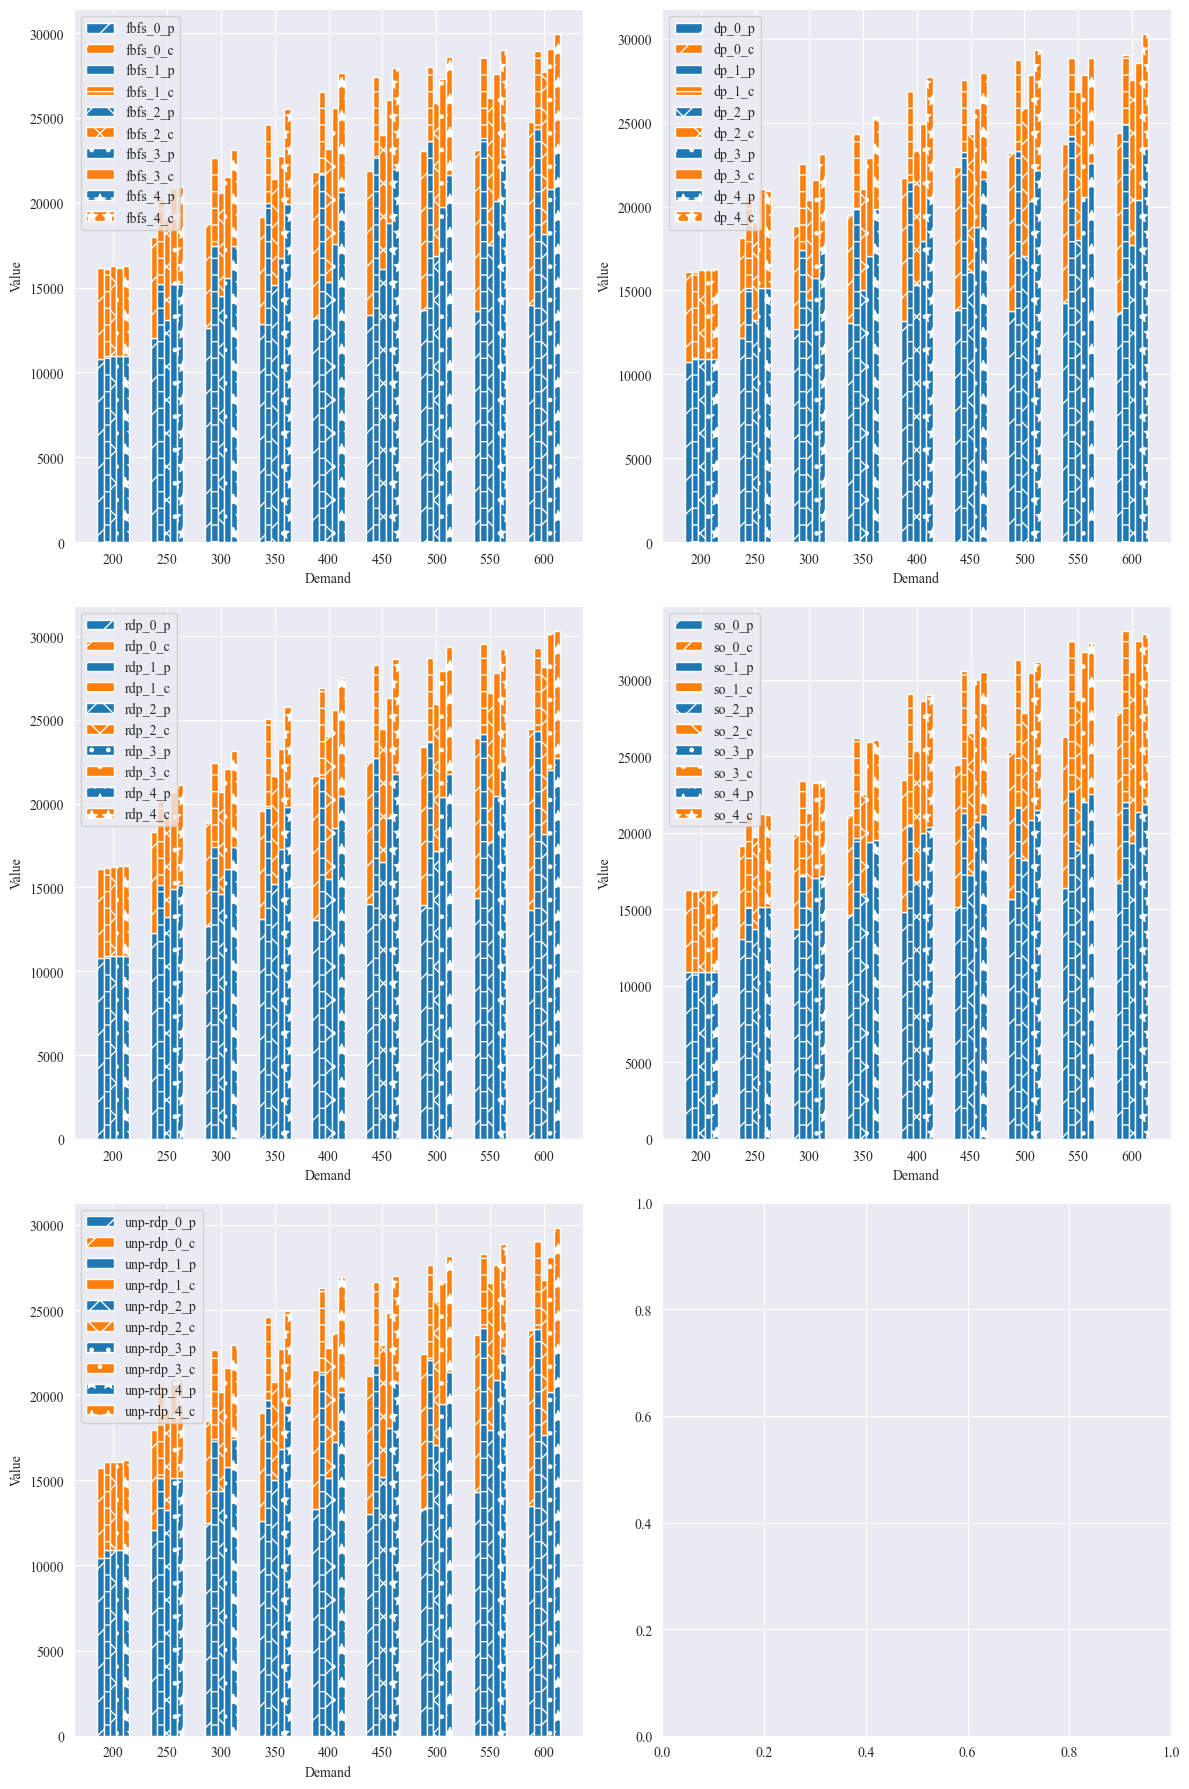

In [83]:
# 假设 df 是你的 DataFrame
# 横轴的需求数据
x_values = [200, 250, 300, 350, 400, 450, 500, 550, 600]

# 方法前缀，例如 'fbfs' 和 'dp'
methods = ['fbfs','dp','rdp','so','unp-rdp']  # 根据需要添加更多方法

hatch_patterns = ['/', '-', 'x', '.', '*']

# 遍历每种方法，绘制堆叠柱状图
fig,axes = plt.subplots(3,2,figsize=(12, 18))  # 设置图形大小
for k,method in enumerate(methods):
    # 找出属于该方法的类别
    categories = sorted(set([col.split('_')[1] for col in temp_dt.index if method in col]))

    # 初始化 bar 图的位置
    bar_width = 0.12
    x_indices = np.arange(len(x_values))

    for i,category in enumerate(categories):
        # 获取对应的 _p 和 _c 值
        p_values = temp_dt.loc[f"{method}_{category}_p", x_values].values
        c_values = temp_dt.loc[f"{method}_{category}_c", x_values].values

        # 绘制堆叠的 bar
        if i == 0:
            bottom_values = np.zeros_like(p_values)
        else:
            bottom_values += temp_dt.loc[f"{method}_{categories[i-1]}_p", x_values].values + \
                             temp_dt.loc[f"{method}_{categories[i-1]}_c", x_values].values

        axes[k//2,k%2].bar(
            x_indices + i * bar_width,
            p_values,
            width=bar_width,
            color='#1f77b4',  # 同一需求下的颜色相同
            hatch=hatch_patterns[i % len(hatch_patterns)],  # 不同类别用不同纹理
            label=f'{method}_{category}_p',
        )
        axes[k//2,k%2].bar(
            x_indices + i * bar_width,
            c_values,
            width=bar_width,
            hatch=hatch_patterns[i % len(hatch_patterns)],  # 不同类别用不同纹理
            color='#ff7f0e',  # 同一需求下的颜色相同
            bottom=p_values,
            label=f'{method}_{category}_c'
        )

    # 图形美化
    axes[k//2,k%2].set_xticks(x_indices + bar_width * (len(categories) - 1) / 2, x_values)
    axes[k//2,k%2].set_xlabel("Demand")
    axes[k//2,k%2].set_ylabel("Value")
    # plt.title(f"Stacked Bar Chart for {method}")
    axes[k//2,k%2].legend()
plt.tight_layout()
plt.show()

In [12]:
temp_arr = np.zeros((5,9))
row_index = result_info['unp-rdp'].keys()
row_index_ = list(result_info['rdp'].keys())
for i,case in enumerate(row_index):
    temp_arr[i] = [(result_info['unp-rdp'][case]['conflict cost'][k][1] - result_info['rdp'][row_index_[i]]['conflict cost'][k][1]) for k in range(9)]
temp_dt_fb = pd.DataFrame(columns=[i*2 for i in range(100,301,25)],data=temp_arr,index=row_index)
temp_dt_fb

200   250   300    350    400    450    500    550    600
unp-rdp_0 -45.0 -70.0 -70.0  -95.0 -145.0 -125.0 -175.0 -165.0 -145.0
unp-rdp_1 -40.0 -90.0 -95.0 -105.0 -165.0 -230.0 -255.0 -170.0 -190.0
unp-rdp_2 -80.0 -80.0 -45.0  -95.0 -150.0 -180.0 -175.0 -130.0 -220.0
unp-rdp_3 -40.0 -25.0 -75.0  -75.0 -140.0 -160.0  -90.0 -160.0 -190.0
unp-rdp_4 -80.0 -25.0 -80.0 -140.0 -215.0 -150.0 -260.0 -225.0 -225.0

In [7]:
temp_dt_fb.T

unp-rdp_0  unp-rdp_1  unp-rdp_2  unp-rdp_3  unp-rdp_4
200      -35.0      -55.0      -45.0      -70.0      -55.0
250      -60.0      -50.0        5.0      -15.0      -15.0
300      -65.0     -110.0      -60.0      -65.0     -140.0
350     -130.0     -225.0     -115.0      -75.0     -115.0
400     -170.0     -155.0     -115.0     -180.0      -90.0
450     -145.0     -195.0     -185.0     -135.0     -140.0
500     -170.0     -230.0     -200.0     -195.0     -210.0
550     -200.0     -225.0     -225.0     -240.0     -260.0
600     -195.0     -240.0     -250.0     -235.0     -245.0

In [8]:
temp_arr = np.zeros((5,9))
row_index = result_info['unp-rdp'].keys()
row_index_ = list(result_info['fbfs'].keys())
for i,case in enumerate(row_index):
    temp_arr[i] = [(result_info['unp-rdp'][case]['success ratio'][k][1] - result_info['fbfs'][row_index_[i]]['success ratio'][k][1]) for k in range(9)]
temp_dt_fb_ = pd.DataFrame(columns=[i*2 for i in range(100,301,25)],data=temp_arr,index=row_index)
temp_dt_fb_

200       250       300       350       400       450  \
unp-rdp_0  0.034332  0.054795  0.051228  0.093157  0.113297  0.088385   
unp-rdp_1  0.056315  0.042135  0.080237  0.146468  0.099409  0.119809   
unp-rdp_2  0.045199 -0.004762  0.042367  0.074540  0.068795  0.101050   
unp-rdp_3  0.071795  0.010652  0.045181  0.047977  0.105508  0.074666   
unp-rdp_4  0.055343  0.009498  0.100425  0.069896  0.053910  0.084778   

                500       550       600  
unp-rdp_0  0.101595  0.114797  0.100497  
unp-rdp_1  0.153733  0.134068  0.146327  
unp-rdp_2  0.105084  0.109609  0.118475  
unp-rdp_3  0.104360  0.134435  0.119955  
unp-rdp_4  0.124350  0.150949  0.138193

In [160]:
# charge util
temp_arr = np.zeros((2,5))
models = ['rdp','unp-rdp']
for i,model in enumerate(models):
    cases = result_info[model].keys()
    for j, case in enumerate(cases):
        temp_arr[i,j] = 1-result_info[model][case]['charge util'][-1][1]
print(temp_arr)

[[0.22395833 0.6875     0.42333333 0.62895833 0.649375  ]
 [0.2175     0.66208333 0.40458333 0.56041667 0.624375  ]]


In [161]:
# compared with fbfs case 0
fb_char_util_300 = 1 - result_info['dp']['dp_0']['charge util'][-1][1]

for i in range(2):
    for j in range(5):
        temp_arr[i,j] = (temp_arr[i,j] - fb_char_util_300) / fb_char_util_300
temp_arr

array([[ 0.00655431,  2.08988764,  0.90262172,  1.82677903,  1.91853933],
       [-0.02247191,  1.97565543,  0.81835206,  1.51872659,  1.80617978]])

In [167]:
# success ratio
temp_arr = np.zeros((2,5))
models = ['rdp','unp-rdp']
for i,model in enumerate(models):
    cases = result_info[model].keys()
    for j, case in enumerate(cases):
        temp_arr[i,j] = result_info[model][case]['success ratio'][-1][1]
print(temp_arr)

[[0.88184438 0.8440678  0.86666667 0.86588921 0.84194529]
 [0.96449704 0.97241379 0.97837838 0.97597598 0.97819315]]


In [168]:
# compared with fbfs case 0
fb_success_util_600 = result_info['dp']['dp_0']['success ratio'][-1][1]

for i in range(2):
    for j in range(5):
        temp_arr[i,j] = (temp_arr[i,j] - fb_success_util_600) / fb_success_util_600
temp_arr

array([[-0.0214372 , -0.06335703, -0.03827957, -0.03914229, -0.06571232],
       [ 0.07028059,  0.07906563,  0.08568439,  0.0830185 ,  0.08547885]])

In [111]:
# RDRA 和baseline model fbfs da 比较
# net revenue / charge util / success ratio
# 5 个 case
temp_arr = np.zeros((3,5))
indictor = ['net revenue','charge util','success ratio']

rdra_case = result_info['unp-rdp'].keys()

for i, ind in enumerate(indictor):
    for j,case in enumerate(rdra_case):
        if i != 1:
            temp_arr[i,j] = result_info['unp-rdp'][case][ind][7][1]
        else:
            temp_arr[i,j] = 1 - result_info['unp-rdp'][case][ind][7][1]

In [112]:
temp_arr_fb = np.zeros((3,5))
compared_case = result_info['fbfs'].keys()

for i, ind in enumerate(indictor):
    for j,case in enumerate(compared_case):
        if i != 1:
            temp_arr_fb[i,j] = result_info['fbfs'][case][ind][7][1]
        else:
            temp_arr_fb[i,j] = 1 - result_info['fbfs'][case][ind][7][1]

In [113]:
temp_arr_da = np.zeros((3,5))
compared_case = result_info['dp'].keys()

for i, ind in enumerate(indictor):
    for j,case in enumerate(compared_case):
        if i != 1:
            temp_arr_da[i,j] = result_info['dp'][case][ind][7][1]
        else:
            temp_arr_da[i,j] = 1 - result_info['dp'][case][ind][7][1]

In [114]:
rdra_fbfs = np.zeros((3,5))
for i in range(3):
    for j in range(5):
        rdra_fbfs[i,j] = (temp_arr[i,j] - temp_arr_fb[i,j]) / temp_arr_fb[i,j]
rdra_fbfs

array([[ 0.02893708, -0.00234419,  0.02321579,  0.01137254,  0.00355031],
       [-0.03647416, -0.02189115, -0.02079108,  0.0141791 , -0.02610114],
       [ 0.13157839,  0.16279657,  0.12703228,  0.15647331,  0.18264264]])

In [115]:
rdra_da = np.zeros((3,5))
for i in range(3):
    for j in range(5):
        rdra_da[i,j] = (temp_arr[i,j] - temp_arr_da[i,j]) / temp_arr_da[i,j]
rdra_da

array([[-1.93037908e-03, -1.15083252e-02, -5.59178821e-03,
         1.48406620e-04,  8.13659123e-03],
       [-2.46153846e-02, -1.86089079e-02, -2.27732794e-02,
         1.79775281e-02, -1.93823916e-02],
       [ 1.19826247e-01,  1.53106596e-01,  8.63425409e-02,
         1.35038283e-01,  1.93765141e-01]])

0.1136363636363636